# **📖📚What Makes a Book Good? 📚📖**
Spring 2025 Data Science Project

Sravya Patibandla, Stuti Pardiwala, Valerie Lin

Contributions:

Valerie: Valerie worked on the initial draft for all sections, but especially on data curation/preprocessing and ML algorithm design/development/analysis (specifically the cherry-picked features portion).

Stuti: Stuti worked on the initial draft for all sections, but especially on Data Exploration and Summary Statistics. She also contributed heavily to the final draft (which included additional analysis, more formal wording and cleaner organization, and nicer visualizations).

Sravya: Sravya worked on the initial draft for all sections, but especially on Data Exploration and Summary Statistics. She also contributed heavily to the final draft.

For the most part, we did all of the work together as a group, and did not divide and conquer.



# Introduction
Before picking up a book, do you ever find yourself checking its rating to see if it’s actually worth reading? This process will more often than not lead you to a Goodreads rating, where you can see all the written reviews along with ratings out of 5 stars. This project aims to dig into what influences book ratings, specifically Goodreads scores. What factors most strongly predict the average Goodreads score of a book? By examining features such as genre, difficulty, story pacing, author gender, average sentence length, and more, we aim to develop a predictive model that not only estimates a book’s potential rating but also uncovers patterns in how readers evaluate books.

Understanding the factors that influence a book's reception is valuable for everyone in the literary world. Publishers can better market their books, authors can gain insights into reader preferences, and readers can better understand how the public evaluates books. From an academic standpoint, this work brings together data science and literature, using numbers to decode the subjective experience of enjoying a book. Ultimately, we hope to make sense of the elusive qualities of storytelling, giving a data-driven perspective on what makes a book resonate with readers.



# Data Curation
Piper, A. (2022). *CONLIT* (figshare) [Data set]. figshare. https://doi.org/10.6084/m9.figshare.21166171.v1

We will be looking at the CONLIT Dataset of Contemporary Literature! The dataset contains manually collected information on approximately 2,700 books that span 12 different genres. We will be using the dataset to determine what aspects of a book make it the most appealing, i.e. which features can best predict the average Goodreads score.

In [181]:
import pandas as pd
conlit_df = pd.read_csv("CONLIT_META.csv")
conlit_df.head(10)

,ID,Category,Language,Genre,Genre2,Pubdate,Author_Last,Author_First,Work_Title,Translation,...,tuldava_score,event_count,speed_avg,circuitousness,speed_min,volume,goodreads_avg,total_ratings,goodreads_URL,Probability1P
0,[Heist Society 2] Uncommon Criminals - Ally Ca...,FIC,English,YA,NaN,2011,Carter,Ally,UncommonCriminals,NaN,...,3.310712,4796,-2.4068,0.17579,-2.5826,-3.0142,4.13,42102.0,https://www.goodreads.com/search?q=Ally+Carter...,0.0
1,"2001_2011_Wilson,RobertCharles_TheChronoliths_...",FIC,English,SF,NaN,2001,Wilson,RobertCharles,TheChronoliths,NaN,...,3.704009,4039,-2.2599,0.23048,-2.4904,-2.9521,3.67,5136.0,https://www.goodreads.com/search?q=+The+Chrono...,1.0
2,"2001_Martel,Yann_LifeofPi_BS.txt",FIC,English,BS,NaN,2001,Yann,Martel,LifeofPi,NaN,...,3.460664,5129,-2.1545,0.15124,-2.3057,-2.8300,3.93,1480498.0,https://www.goodreads.com/search?q=+Lifeof+Pi,1.0
3,"2002_2011_Anderson,MT_Feed_SF.txt",FIC,English,SF,YA,2002,Anderson,MT,Feed,NaN,...,2.909212,3479,-2.3438,0.13506,-2.4788,-2.8989,3.56,61346.0,https://www.goodreads.com/search?q=MT+Anderson...,1.0
4,"2002_Baker,Jo_Offcomer_CT.txt",FIC,English,NYT,NaN,2002,Baker,Jo,Offcomer,NaN,...,3.183173,6314,-2.1152,0.26496,-2.3801,-2.8866,2.58,145.0,https://www.goodreads.com/search?q=Jo+Baker+Of...,0.0
5,"2002_Kidd,SueMonk_TheSecretLifeofBees_BS.txt",FIC,English,BS,NaN,2002,SueMonk,Kidd,TheSecretLifeofBees,NaN,...,3.398070,7204,-2.3821,0.19713,-2.5792,-3.0648,4.07,1203836.0,https://www.goodreads.com/search?q=+The+Secret...,1.0
6,"2002_Sebold,Alice_LovelyBones_BS.txt",FIC,English,BS,NaN,2002,Alice,Sebold,LovelyBones,NaN,...,3.570598,6884,-2.3458,0.20992,-2.5557,-3.0493,3.83,2185111.0,https://www.goodreads.com/search?q=Sebold+Alic...,1.0
7,"2003_Hosseini,Khaled_TheKiteRunner_BS.txt",FIC,English,BS,NaN,2003,Khaled,Hosseini,TheKiteRunner,NaN,...,3.286319,8770,-2.2408,0.20092,-2.4417,-2.9666,4.32,2765961.0,https://www.goodreads.com/search?q=Hosseini+Kh...,1.0
8,"2003_Landay,William_MissionFlats_MY.txt",FIC,English,MY,NaN,2003,Landay,William,MissionFlats,NaN,...,3.141345,6061,-2.1397,0.26245,-2.4021,-2.9433,3.56,4517.0,https://www.goodreads.com/search?q=William+Lan...,1.0
9,"2003_Low,Gennita_IntoDanger_ROM.txt",FIC,English,ROM,NaN,2003,Low,Gennita,IntoDanger,NaN,...,3.329391,9268,-2.3083,0.24370,-2.5520,-3.0897,4.02,602.0,https://www.goodreads.com/search?q=Gennita+Low...,0.0


So here is our dataset!


# Exploratory Data Analysis


First, let's check out the general structure of our data.

In [182]:
print(conlit_df.shape)

(2754, 30)


So our data set contains 2,754 books (rows), and has 30 features (columns). The columns and respective data types are as follows:

In [183]:
display(conlit_df.dtypes)

,0
ID,object
Category,object
Language,object
Genre,object
Genre2,object
Pubdate,int64
Author_Last,object
Author_First,object
Work_Title,object
Translation,object


Our data set contains mostly strings, floats, and integers.

Let's also take a minute to interpret what some of these less self-explanatory columns mean, based on the Read Me file provided by the data set author.



*   ***token count*** is the number of tokens, including punctuation, in the book
*   ***total characters*** is the total number of named characters
*   ***token count*** is the number of tokens, including punctuation, in the book
*   ***protagonist concentration*** is the number of the occurences of the main protagonist, divided by the number of occurrences of any of the named characters.
*   ***tuldava score*** is a measure of reading difficulty that is computed using the number of syllables, words, and sentences.
*   ***event count*** is the number of actual (not hypothetical) events that occur in the book
*   ***Probability1P*** is the probability that the book was written in mostly first person. This was determined using an ML model and not by hand.
*   ***speed average*** is a measure of semantic distance between sections of the book. It is indicative of the pace of a book.
*   ***circuitousness*** is the difference between the shortest semantic path between sections of the book, and the actual semantic path. This is indicative of how non-linear the book narrative is.
*   ***volume*** is a measure of the semantic spread of a book sections. It is indicative of the amount of "bagginess" or "fluff" in a book.


We want to see if these or any other features are part of the formula for a high-ranking book!





## Cleaning the Data

Next let's see if all of our books are unique. In this case, we would expect the book ID, Work_Title, and goodreads_URL to be unique for different books. Let's check if that's the case.

In [184]:
print("\t\tUnique\tNot null")
for col in ["ID", "Work_Title", "goodreads_URL"]:
  print("{:16}{:6}{:10}".format(col, conlit_df[col].nunique(), conlit_df[col].notnull().sum()))

		Unique	Not null
ID                2754      2754
Work_Title        2742      2754
goodreads_URL     2752      2754


It looks like our ID's are all unique, but Work_Title and goodreads_URL are not! Let's dig deeper and see why.

In [185]:
title_dups = conlit_df["Work_Title"].value_counts()[lambda x: x > 1]
url_dups = conlit_df["goodreads_URL"].value_counts()[lambda x: x > 1]
title_dup_data = conlit_df[conlit_df["Work_Title"].isin(title_dups.index)]
url_dup_data = conlit_df[conlit_df["goodreads_URL"].isin(url_dups.index)]

display(title_dup_data.sort_values(by="Work_Title"))
display(url_dup_data.sort_values(by="goodreads_URL"))

,ID,Category,Language,Genre,Genre2,Pubdate,Author_Last,Author_First,Work_Title,Translation,...,tuldava_score,event_count,speed_avg,circuitousness,speed_min,volume,goodreads_avg,total_ratings,goodreads_URL,Probability1P
1675,"2015_James,Marlon_ABriefHistoryofSevenKillings...",FIC,English,PW,NaN,2015,James,Marlon,ABriefHistoryofSevenKillings,NaN,...,3.271848,7778,-2.2047,0.259670,-2.4643,-3.2342,3.89,31346.0,https://www.goodreads.com/search?q=+A+Brief+Hi...,1.0
1246,"2014_James,Marlon_ABriefHistoryofSevenKillings...",FIC,English,NYT,NaN,2014,James,Marlon,ABriefHistoryofSevenKillings,NaN,...,3.271848,7778,-2.2047,0.259670,-2.4643,-3.2342,3.89,31346.0,https://www.goodreads.com/search?q=+A+Brief+Hi...,1.0
26,"2005_Gardner,Lisa_Alone_BS.txt",FIC,English,BS,NaN,2005,Lisa,Gardner,Alone,NaN,...,3.207248,6911,-2.1546,0.286570,-2.4412,-2.9514,3.97,60106.0,https://www.goodreads.com/search?q=Gardner+Lis...,0.0
1162,"2014_Elliot,Kendra_Alone_ROM.txt",FIC,English,ROM,NaN,2014,Elliot,Kendra,Alone,NaN,...,3.038173,6714,-2.2285,0.233970,-2.4624,-2.9493,4.19,15408.0,https://www.goodreads.com/search?q=Kendra+Elli...,0.0
214,"2009_McDougall,Christopher_BorntoRun_ME.txt",NON,English,MEM,NaN,2009,McDougall,Christopher,BorntoRun,NaN,...,4.133225,4324,-2.3078,0.130710,-2.4386,-2.9118,4.30,189518.0,https://www.goodreads.com/search?q=+Bornto+Run,1.0
2318,"2016_Springsteen,Bruce_BorntoRun_ME.txt",NON,English,MEM,NaN,2016,Springsteen,Bruce,BorntoRun,NaN,...,3.944569,5658,-2.3182,0.175590,-2.4938,-3.0860,4.30,189518.0,https://www.goodreads.com/search?q=+Bornto+Run,1.0
877,"2013_Howey,Hugh_Dust_SF.txt",FIC,English,SF,NaN,2013,Howey,Hugh,Dust,NaN,...,3.259251,10530,-2.2122,0.247280,-2.4595,-3.0052,4.25,73870.0,https://www.goodreads.com/search?q=Hugh+Howey+...,0.0
829,"2013_Cornwell,Patricia_Dust_MY.txt",FIC,English,MY,NaN,2013,Cornwell,Patricia,Dust,NaN,...,3.650265,6141,-2.3019,0.196510,-2.4984,-3.0552,3.63,18699.0,https://www.goodreads.com/search?q=Patricia+Co...,1.0
1589,"2015_Douglas,Penelope_FallingAway_ROM.txt",FIC,English,ROM,NaN,2015,Douglas,Penelope,FallingAway,NaN,...,2.983492,12586,-2.3304,0.234100,-2.5645,-3.1102,3.96,148679.0,https://www.goodreads.com/search?q=Penelope+Do...,1.0
1476,"2014_Wilder,Jasinda_FallingAway_ROM.txt",FIC,English,ROM,NaN,2014,Wilder,Jasinda,FallingAway,NaN,...,3.016028,6468,-2.1719,0.252430,-2.4243,-2.9148,4.16,3217.0,https://www.goodreads.com/search?q=Jasinda+Wil...,1.0


,ID,Category,Language,Genre,Genre2,Pubdate,Author_Last,Author_First,Work_Title,Translation,...,tuldava_score,event_count,speed_avg,circuitousness,speed_min,volume,goodreads_avg,total_ratings,goodreads_URL,Probability1P
1246,"2014_James,Marlon_ABriefHistoryofSevenKillings...",FIC,English,NYT,NaN,2014,James,Marlon,ABriefHistoryofSevenKillings,NaN,...,3.271848,7778,-2.2047,0.25967,-2.4643,-3.2342,3.89,31346.0,https://www.goodreads.com/search?q=+A+Brief+Hi...,1.0
1675,"2015_James,Marlon_ABriefHistoryofSevenKillings...",FIC,English,PW,NaN,2015,James,Marlon,ABriefHistoryofSevenKillings,NaN,...,3.271848,7778,-2.2047,0.25967,-2.4643,-3.2342,3.89,31346.0,https://www.goodreads.com/search?q=+A+Brief+Hi...,1.0
214,"2009_McDougall,Christopher_BorntoRun_ME.txt",NON,English,MEM,NaN,2009,McDougall,Christopher,BorntoRun,NaN,...,4.133225,4324,-2.3078,0.13071,-2.4386,-2.9118,4.30,189518.0,https://www.goodreads.com/search?q=+Bornto+Run,1.0
2318,"2016_Springsteen,Bruce_BorntoRun_ME.txt",NON,English,MEM,NaN,2016,Springsteen,Bruce,BorntoRun,NaN,...,3.944569,5658,-2.3182,0.17559,-2.4938,-3.0860,4.30,189518.0,https://www.goodreads.com/search?q=+Bornto+Run,1.0


We can see that most of these books are distinct books that just have similar titles. The only true duplicate is *A Brief History of Seven Killings* by Marlon James, which is included twice due to different publishing dates, despite being the same book. We can then simply remove the earlier version from 2014.

In [186]:
conlit_df.drop(1246, inplace=True)

Now we can explore which columns we want to keep for our analysis, and which columns to drop. First, observe that the goodreads_URL, Author_Last, and Author_First attributes should not have any bearing on the average Goodreads score and are difficult to analyze. Without using NLP, Work_Title also does not help determine the Goodreads score. So we'll go ahead and drop all of these columns.

In [187]:
conlit_df.drop(["Author_Last", "Author_First", "Work_Title", "goodreads_URL"], axis=1, inplace=True)

Next, let's take a closer look at our categorical data.

In [188]:
categories = ["Category", "Language", "Genre", "Genre2", "Translation", "PubHouse",
              "Prize", "WinnerShortlist", "Author_Gender", "Author_Nationality"]

for col in categories:
  display(conlit_df[col].value_counts())

,count
Category,
FIC,1933
NON,820


,count
Language,
English,2753


,count
Genre,
NYT,418
PW,258
BS,249
MY,234
MEM,229
SF,223
ROM,208
HIST,205
BIO,193


,count
Genre2,
YA,50
NYT,34
MY,7
SF,5
ROM,2
MEM,1
BS,1


,count
Translation,
French,6
Swedish,4
German,2
Norwegian,2
Danish,1


,count
PubHouse,
HarperCollins,42
RandomHouseCa,27
RandomHouse,23
Doubleday,20
PenguinGroupUSA,18
...,...
UniversityofIllinoisPress,1
Tor,1
BaenBooks,1


,count
Prize,
ScotiabankGillerPrize,52
PEN/FaulknerAwardforFiction,51
TheManBookerPrize,47
TheNationalBookAwards,41
GovernorGeneralLiteraryAwardforfiction,40
NationalBookAwards,9
GovernerGeneral's,9
ManBooker,9


,count
WinnerShortlist,
Shortlist,208
Winner,50


,count
Author_Gender,
M,1374
F,1370
o,8


,count
Author_Nationality,
US,932
Canada,148
UK,144
Australia,18
Ireland,11
...,...
Germany/UK,1
CanadaIreland,1
India/Canada,1


Observe that the **Language** column is mostly uniform, and the **Translation** and **Author_Nationality** columns are fairly skewed. In addition, **Genre2** and **PubHouse** contain mostly missing data.

For these reasons, we'll go ahead and drop these columns.

In [189]:
cols_to_drop = ["Language", "Genre2", "Translation", "PubHouse", "Prize", "Author_Nationality"]
conlit_df.drop(columns=cols_to_drop, inplace=True)

Observe that **WinnerShortlist** and **Prize** also contain lots of missing data, but in this case, the missing data simply means that the book did not win or shortlist for a prize. Also note that the **Prize** column indicates which prize the book won/was shortlisted for, while WinnerShortlist indicates whether the book won or was shortlisted for the prize.

We will then drop the **Prize** column and fill the missing values in WinnerShortlist with "No Prize". While this column is fairly skewed, unlike the **Author** **Nationality** and **Translation** columns, we have reason to believe that this column may be more helpful for determining average Goodreads rating as books that win prizes may have higher ratings.

In [190]:
conlit_df["WinnerShortlist"] = conlit_df["WinnerShortlist"].fillna("NoPrize")

Now before we look at our quantitative data, let's take a look at our remaining missing values (this will make creating boxplots easier later).

In [191]:
conlit_df.isna().sum()[lambda x: x != 0]

,0
Author_Gender,1
protagonist_concentration,2
speed_avg,1
circuitousness,1
speed_min,1
volume,1
goodreads_avg,1
total_ratings,1


In [192]:
listwise_deletion = ["Author_Gender", "protagonist_concentration", "speed_avg",
                     "circuitousness", "speed_min", "volume", "goodreads_avg",
                     "total_ratings"]

conlit_df.dropna(subset=listwise_deletion, inplace=True)

*Now* let's explore our quantitative data!

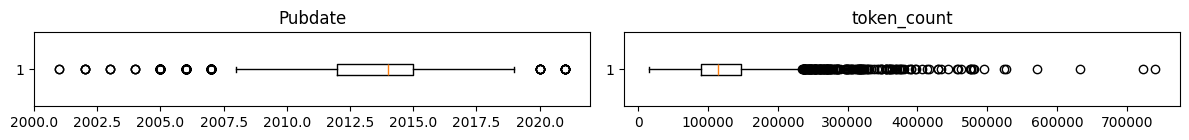

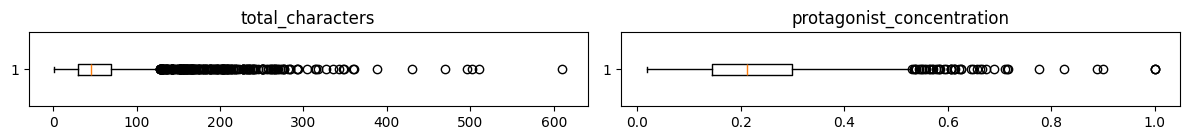

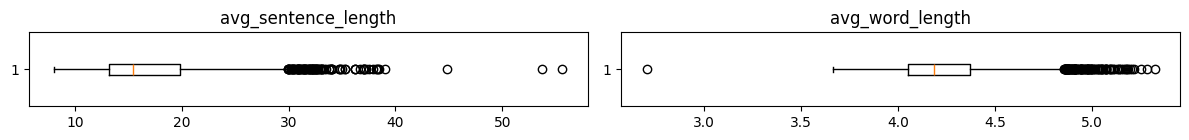

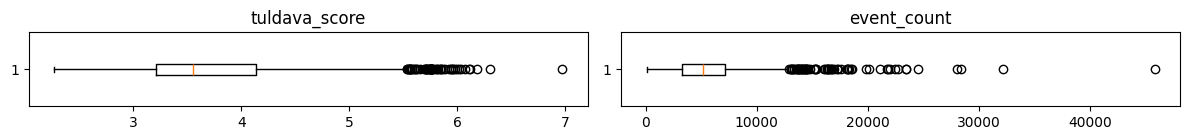

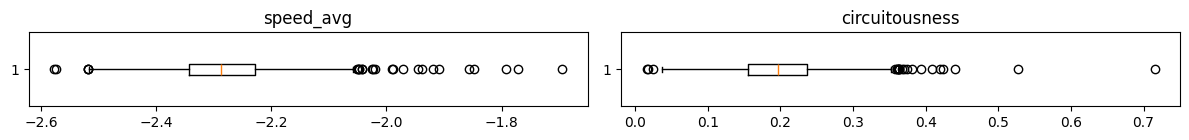

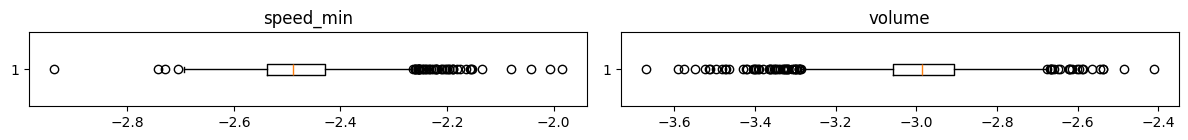

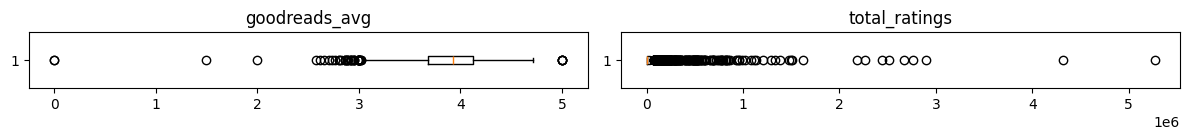

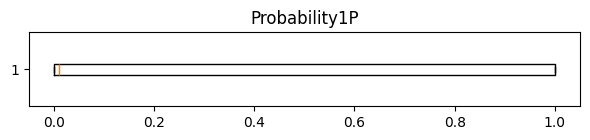

In [193]:
import matplotlib.pyplot as plt

quantitative_cols = ["Pubdate", "token_count", "total_characters", "protagonist_concentration",
                     "avg_sentence_length", "avg_word_length", "tuldava_score", "event_count",
                     "speed_avg", "circuitousness", "speed_min", "volume", "goodreads_avg",
                     "total_ratings", "Probability1P"]

import matplotlib.pyplot as plt

num_rows = 7
num_cols = 2
total_plots = num_rows * num_cols

for row in range(num_rows):
    fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 1.5))
    for col in range(num_cols):
        idx = row * num_cols + col
        qc = quantitative_cols[idx]
        ax = axs[col]
        ax.boxplot(conlit_df[qc], vert=False)
        ax.set_title(qc)
    plt.tight_layout()
    plt.show()

fig = plt.figure(figsize =(6, 1.5))
plt.title("Probability1P")
plt.boxplot(conlit_df["Probability1P"], vert=False)
plt.tight_layout()
plt.show()



In the boxplot we can see that **Probablity1P** has many values clustered around 0. This is because Probability1P indicates whether the book is likely to have a 1st or 3rd person persepecive, where 1 indicates 1st perspective. Since most of our probabilities are fairly certain, the values are clustered around 0 or 1, as we can see in the histogram below.

<Axes: >

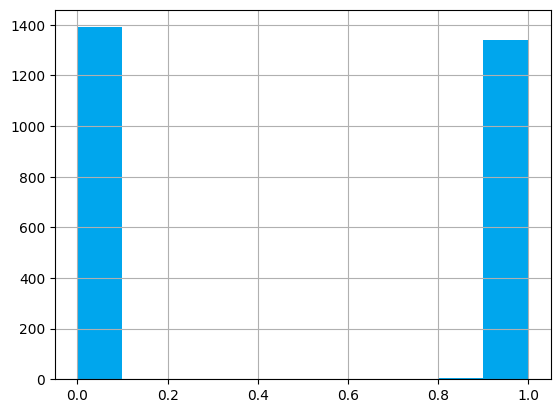

In [194]:
conlit_df['Probability1P'].hist(color='#00a6ed')

We can then go ahead and use a step function to convert any in-between probabilities to "first person" or "third person". Our new column is binary, and indicates whether the book is believed to be 1st or 3rd person.

In [195]:
import numpy as np
def step(x):
  if x>0.5:
    return "first person"
  else: return "third person"

conlit_df['Probability1P'] = conlit_df['Probability1P'].apply(step)
quantitative_cols.remove("Probability1P")
categories.append("Probability1P")
conlit_df

,ID,Category,Genre,Pubdate,WinnerShortlist,Author_Gender,token_count,total_characters,protagonist_concentration,avg_sentence_length,avg_word_length,tuldava_score,event_count,speed_avg,circuitousness,speed_min,volume,goodreads_avg,total_ratings,Probability1P
0,[Heist Society 2] Uncommon Criminals - Ally Ca...,FIC,YA,2011,NoPrize,F,80392,34,0.342902,14.106334,4.129571,3.310712,4796,-2.4068,0.17579,-2.5826,-3.0142,4.13,42102.0,third person
1,"2001_2011_Wilson,RobertCharles_TheChronoliths_...",FIC,SF,2001,NoPrize,M,103230,34,0.150333,15.350186,4.309161,3.704009,4039,-2.2599,0.23048,-2.4904,-2.9521,3.67,5136.0,first person
2,"2001_Martel,Yann_LifeofPi_BS.txt",FIC,BS,2001,NoPrize,M,124445,27,0.275720,13.902916,4.174217,3.460664,5129,-2.1545,0.15124,-2.3057,-2.8300,3.93,1480498.0,first person
3,"2002_2011_Anderson,MT_Feed_SF.txt",FIC,SF,2002,NoPrize,M,67075,14,0.283099,12.149067,3.889661,2.909212,3479,-2.3438,0.13506,-2.4788,-2.8989,3.56,61346.0,first person
4,"2002_Baker,Jo_Offcomer_CT.txt",FIC,NYT,2002,NoPrize,F,88042,24,0.431358,12.637003,4.226161,3.183173,6314,-2.1152,0.26496,-2.3801,-2.8866,2.58,145.0,third person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,"Woman Behind the New Deal, The - Kirstin Downe...",NON,BIO,2009,NoPrize,F,174567,161,0.340893,22.007943,4.869984,4.886094,5310,-2.2453,0.17297,-2.4183,-2.9783,4.22,1798.0,third person
2750,"Woman of No Importance, A - Sonia Purnell.txt",NON,BIO,2019,NoPrize,F,133983,100,0.325672,25.945585,4.662154,5.002344,3561,-2.4003,0.14741,-2.5477,-3.0649,4.12,33198.0,third person
2751,"Woodrow Wilson - John Milton Cooper, Jr_.txt",NON,BIO,2009,NoPrize,M,314641,220,0.117740,26.991593,4.800018,5.219821,8682,-2.3632,0.16511,-2.5283,-3.2655,3.82,6075.0,third person
2752,You Never Forget Your First - Alexis Coe.txt,NON,BIO,2020,NoPrize,F,64409,74,0.141928,26.171881,4.728378,4.938083,1458,-2.2849,0.12859,-2.4135,-2.8017,3.75,10699.0,third person


Lastly, let's take an even closer look at our target variable, average Goodreads rating.

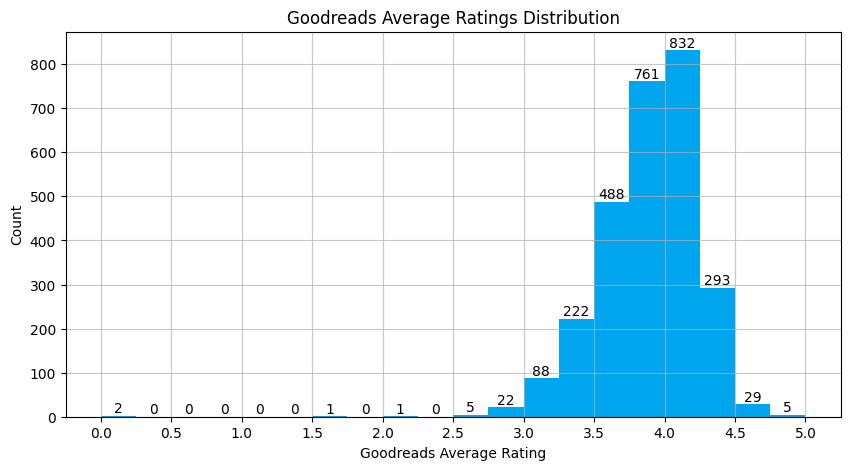

In [196]:
plt.figure(figsize=(10, 5))
counts, edges, bars = plt.hist(conlit_df["goodreads_avg"], bins=np.arange(0, 5.25, 0.25), color='#00a6ed')
plt.bar_label(bars)
plt.xticks(ticks=np.arange(0, 5.25, 0.5))
plt.grid(True, linestyle='-', alpha=0.7)
plt.xlabel("Goodreads Average Rating")
plt.ylabel("Count")
plt.title("Goodreads Average Ratings Distribution")
plt.show()

We see that our distribution is fairly  symmetric. Furthermore, the majority of our average Goodreads ratings fall between 3 and 4.5, which is expected since the author of the dataset intentionally chose books that were fairly popular.

## Finding Relationships

We will now run a few tests to see if we can identify attributes that significantly affect Goodreads ratings.

We can start by performing an ANOVA test to see if there is a difference between the genres. Our hypotheses are as follows:

**Null Hypothesis (H<sub>0</sub>):** The mean Goodreads ratings are the same across all genres

**Alternative Hypothesis (H<sub>a</sub>):** At least one genre has a significantly different mean Goodreads rating from the others.

In [197]:
from scipy import stats

df_clean = conlit_df.dropna(subset=['goodreads_avg'])

anova_result = stats.f_oneway(*[df_clean[df_clean['Genre'] == genre]['goodreads_avg'] for genre in df_clean['Genre'].unique()])

print(f"ANOVA Test Results:\n")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4e}")

ANOVA Test Results:

F-statistic: 73.9332
P-value: 7.9727e-146


Since the p-value is so low, we can comfortably reject the null hypothesis. Additionally, the f statistic is very big, indicating a large variance between the means of the different genres.

To visualize the difference between the different genres, we can make a box and whisker plot for each genre to see the distribution.

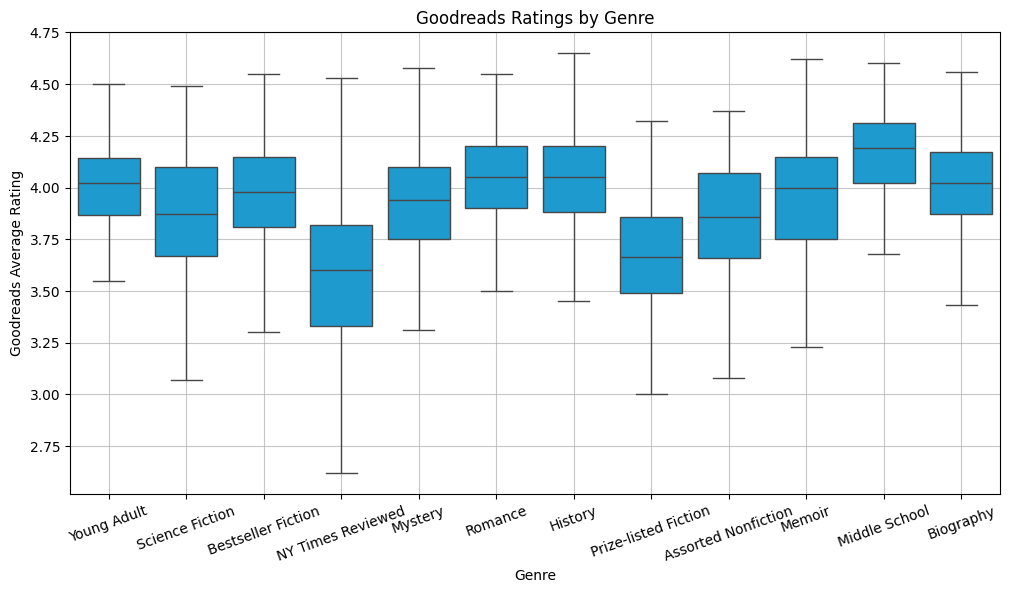

In [198]:
import seaborn as sns

#improving readability
genre_mapping = {
    "BIO": "Biography",
    "BS": "Bestseller Fiction",
    "HIST": "History",
    "MEM": "Memoir",
    "MID": "Middle School",
    "MIX": "Assorted Nonfiction",
    "MY": "Mystery",
    "NYT": "NY Times Reviewed",
    "PW": "Prize-listed Fiction",
    "ROM": "Romance",
    "SF": "Science Fiction",
    "YA": "Young Adult"
}

conlit_df["Genre"] = conlit_df["Genre"].map(genre_mapping)

unique_genres = conlit_df["Genre"].dropna().unique()

# Filter dataset to include only books with a listed genre

filtered_df = conlit_df[conlit_df["Genre"].isin(unique_genres)]

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x="Genre", y="goodreads_avg", showfliers=False, color='#00a6ed')
plt.xticks(rotation=20)
plt.grid(True, linestyle='-', alpha=0.7)
plt.xlabel("Genre")
plt.ylabel("Goodreads Average Rating")
plt.title("Goodreads Ratings by Genre")
plt.show()

Now we will use a Tukey Test to determine precisely which pairs of book genres have statistically significant differences in their Goodreads average ratings (goodreads_avg).

In [199]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(conlit_df['goodreads_avg'], conlit_df['Genre'], alpha=0.05)
print(tukey_results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
 Assorted Nonfiction   Bestseller Fiction   0.1262 0.0014  0.0288  0.2235   True
 Assorted Nonfiction            Biography   0.1809    0.0  0.0776  0.2842   True
 Assorted Nonfiction              History   0.1567    0.0  0.0549  0.2585   True
 Assorted Nonfiction               Memoir   0.1324 0.0008  0.0332  0.2315   True
 Assorted Nonfiction        Middle School   0.3391    0.0  0.2316  0.4467   True
 Assorted Nonfiction              Mystery    0.087 0.1473 -0.0117  0.1856  False
 Assorted Nonfiction    NY Times Reviewed  -0.2434    0.0 -0.3318  -0.155   True
 Assorted Nonfiction Prize-listed Fiction  -0.1596    0.0 -0.2561  -0.063   True
 Assorted Nonfiction              Romance   0.2011    0.0  0.0997  0.3026   True
 Assorted Nonfiction      Sc

The results show several significant differences between genres, such as Assorted Nonfiction and Bestseller Fiction, with a p-value of 0.0014, indicating a meaningful difference in their ratings. Conversely, pairs like Bestseller Fiction and Biography did not show significant differences, with a p-value of 0.7937. These findings suggest that some genres are rated distinctly, while others are perceived similarly by readers, providing insights into genre preferences and perceptions.

Next, let's explore if there's any significant correlation between total Goodreads ratings and average Goodreads rating. It's possible that more popular books (with more reviews). are rated more highly.

In [200]:
correlation = conlit_df['goodreads_avg'].corr(conlit_df['total_ratings'])
print(correlation)

0.13584352308832146


A correlation of 0.1358 suggests a very weak positive relationship between Goodreads' average rating and total ratings. This means that while books with higher ratings may slightly tend to have more total ratings, the relationship is weak and not very predictive.

Lets see how this looks visually:

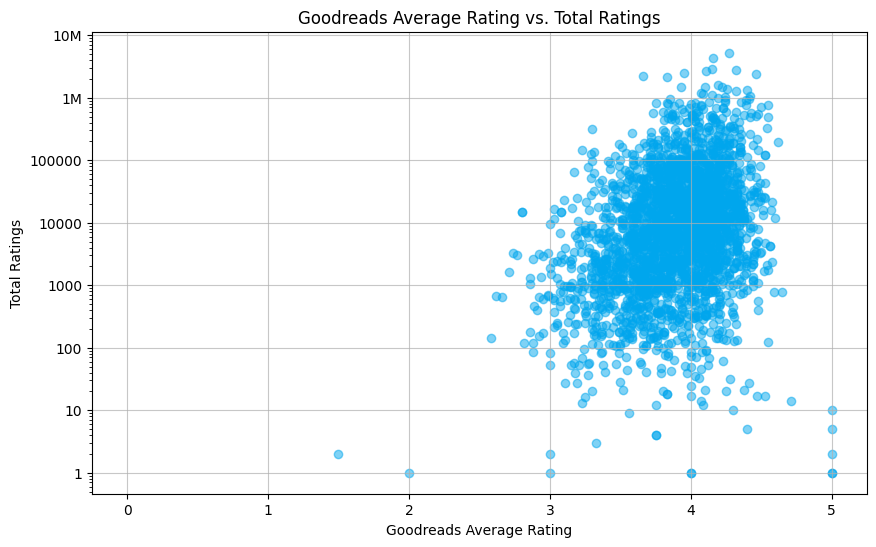

In [201]:
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 6))
plt.scatter(conlit_df['goodreads_avg'], conlit_df['total_ratings'], alpha=0.5, color='#00a6ed')

plt.ylabel('Total Ratings')
plt.xlabel('Goodreads Average Rating')
plt.title('Goodreads Average Rating vs. Total Ratings')

plt.yscale('log')
plt.grid(True, linestyle='-', alpha=0.7)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M' if x >= 1e6 else f'{int(x)}'))


plt.grid(True)
plt.show()

- Dense Cluster at High Ratings (3.5 - 4.5):
    - Most data points are concentrated between 3.5 and 4.5 average rating.
    - This suggests that most books tend to receive similar ratings, likely due to rating biases (e.g., people mostly rate books they enjoy).

- Logarithmic Scale on Y-axis (Total Ratings):
  - The total ratings range from 1 to over 10 million, meaning there is a huge variation in popularity among books.
  - Most books have far fewer ratings, while a small number of books have exceptionally high ratings.

The scatter plot aligns with the low correlation value (0.1358) because it shows no strong upward trend and a high variance in total ratings across different rating values. While there is a slight positive relationship, it is weak and easily overshadowed by other factors, which is exactly what a correlation value close to zero suggests.

Next we'll see if Goodreads rating differ by author gender.This might be the case if readers have an implicit bias towards a particular gender. We will run a two-sample t-test since we do not know the population standard deviation (Since there are only 8 books where the author's gender is "other", we will not include these books in the test).

Null Hypothesis (H<sub>0</sub>): The mean Goodreads ratings is the same for both male and female authors.

Alternative Hypothesis (H<sub>a</sub>): The mean Goodreads ratings differs for male and female authors.

In [202]:
ttest = stats.ttest_ind(a=conlit_df[conlit_df['Author_Gender']=="M"]['goodreads_avg'], b=conlit_df[conlit_df['Author_Gender']=="F"]['goodreads_avg'])
print("p-value: ", ttest.pvalue)

p-value:  0.2506865511970483


The p-value is 0.25, which is fairly high (greater than 0.05). So we fail to reject the null hypothesis and can conclude that the average goodreads rating is most likely the same/similar for both male and female authors. Let's check this visually with some boxplots.

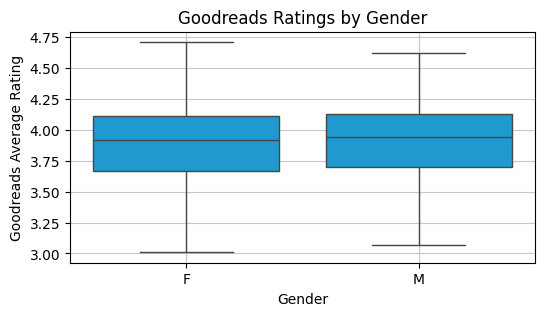

In [203]:
genders_df = conlit_df[(conlit_df["Author_Gender"]=="M") | (conlit_df["Author_Gender"]=="F")]

plt.figure(figsize=(6, 3))
sns.boxplot(data=genders_df, x="Author_Gender", y="goodreads_avg", showfliers=False, color='#00a6ed')
plt.grid(True, linestyle='-', alpha=0.7)
plt.xlabel("Gender")
plt.ylabel("Goodreads Average Rating")
plt.title("Goodreads Ratings by Gender")
plt.show()

From the plots above, we can clearly see that the mean and distribution of the average Goodreads rating for male and female authors are indeed quite similar.

Now for fun, let's take a look at this related dataset by the same author:

In [204]:
supersense_df = pd.read_csv("CONLIT_SUPERSENSE.csv")
supersense_df

,file_name,noun.Tops,noun.act,noun.animal,noun.artifact,noun.attribute,noun.body,noun.cognition,noun.communication,noun.event,...,verb.consumption,verb.contact,verb.creation,verb.emotion,verb.motion,verb.perception,verb.possession,verb.social,verb.stative,verb.weather
0,[Heist Society 2] Uncommon Criminals - Ally Ca...,26,533,41,2255,288,792,346,1056,173,...,125,922,93,228,1321,1112,451,585,2001,10
1,"2001_2011_Wilson,RobertCharles_TheChronoliths_...",72,948,115,2946,593,618,715,1343,426,...,177,855,240,432,1235,724,612,866,2752,12
2,"2001_Martel,Yann_LifeofPi_BS.txt",91,1065,1877,3127,962,1805,855,1423,573,...,398,1673,249,458,2139,1179,625,668,4031,22
3,"2002_2011_Anderson,MT_Feed_SF.txt",20,367,111,1565,154,892,221,705,133,...,106,837,147,330,1271,732,336,454,1939,9
4,"2002_Baker,Jo_Offcomer_CT.txt",29,419,96,3826,312,1961,235,791,207,...,136,1867,93,288,2157,1328,339,431,1823,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,"Woman Behind the New Deal, The - Kirstin Downe...",54,3500,57,2129,988,309,1672,2937,643,...,289,673,701,916,1368,825,1413,3296,3664,3
2750,"Woman of No Importance, A - Sonia Purnell.txt",43,2575,102,2856,800,402,938,1870,439,...,246,824,371,479,1648,664,1055,1953,3142,5
2751,"Woodrow Wilson - John Milton Cooper, Jr_.txt",124,7081,58,2423,2451,515,4100,7982,1450,...,408,942,1136,1491,1863,1190,1830,4697,6545,4
2752,You Never Forget Your First - Alexis Coe.txt,18,921,84,714,385,176,434,1181,212,...,111,278,207,268,539,260,613,894,1508,2


The dataset contains counts for various different types of words in each book. For example, values under the column "noun.animal" indicate the number of times a noun relating to an animal appeared in the book. These are the same books listed in our original dataset. Let's go ahead and created a merged dataset that includes the book titles, average goodreads, rating, and supersenses.



In [205]:
supersense_df = supersense_df.rename(columns={'file_name': 'ID'})
merged_df = pd.merge(conlit_df.loc[:, ['ID', 'goodreads_avg']], supersense_df, on="ID")
merged_df

,ID,goodreads_avg,noun.Tops,noun.act,noun.animal,noun.artifact,noun.attribute,noun.body,noun.cognition,noun.communication,...,verb.consumption,verb.contact,verb.creation,verb.emotion,verb.motion,verb.perception,verb.possession,verb.social,verb.stative,verb.weather
0,[Heist Society 2] Uncommon Criminals - Ally Ca...,4.13,26,533,41,2255,288,792,346,1056,...,125,922,93,228,1321,1112,451,585,2001,10
1,"2001_2011_Wilson,RobertCharles_TheChronoliths_...",3.67,72,948,115,2946,593,618,715,1343,...,177,855,240,432,1235,724,612,866,2752,12
2,"2001_Martel,Yann_LifeofPi_BS.txt",3.93,91,1065,1877,3127,962,1805,855,1423,...,398,1673,249,458,2139,1179,625,668,4031,22
3,"2002_2011_Anderson,MT_Feed_SF.txt",3.56,20,367,111,1565,154,892,221,705,...,106,837,147,330,1271,732,336,454,1939,9
4,"2002_Baker,Jo_Offcomer_CT.txt",2.58,29,419,96,3826,312,1961,235,791,...,136,1867,93,288,2157,1328,339,431,1823,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,"Woman Behind the New Deal, The - Kirstin Downe...",4.22,54,3500,57,2129,988,309,1672,2937,...,289,673,701,916,1368,825,1413,3296,3664,3
2745,"Woman of No Importance, A - Sonia Purnell.txt",4.12,43,2575,102,2856,800,402,938,1870,...,246,824,371,479,1648,664,1055,1953,3142,5
2746,"Woodrow Wilson - John Milton Cooper, Jr_.txt",3.82,124,7081,58,2423,2451,515,4100,7982,...,408,942,1136,1491,1863,1190,1830,4697,6545,4
2747,You Never Forget Your First - Alexis Coe.txt,3.75,18,921,84,714,385,176,434,1181,...,111,278,207,268,539,260,613,894,1508,2


Note that we have no missing data, as seen below.

In [206]:
merged_df.isna().sum()[lambda x: x != 0]

,0


Let's see if there's a correlation between any of these word counts and average goodreads rating!

In [207]:
count = 0
merged_df2 = merged_df.drop(columns=["ID"])

print("Columns with correlation >|0.5|: ", count)

for columnName in merged_df2:
    correlation = merged_df2['goodreads_avg'].corr(merged_df2[columnName])
    if abs(correlation)>0.5:
      print('Column Name : ', columnName)
      print('Correlation : ', correlation, "\n")
    if abs(correlation)>0.4: count +=1

#merged_df2.corr()["goodreads_avg"].rename("correlation")

Columns with correlation >|0.5|:  0
Column Name :  goodreads_avg
Correlation :  0.9999999999999999 



Unfortunately, it doesn't seem like any of our word supersenses correlate to goodreads ratings (the only column that had a strong correlation was the goodreads_avg correlating with itself).


Almost done! Let's see how the quantitative features in our dataset generally correlate with each other.

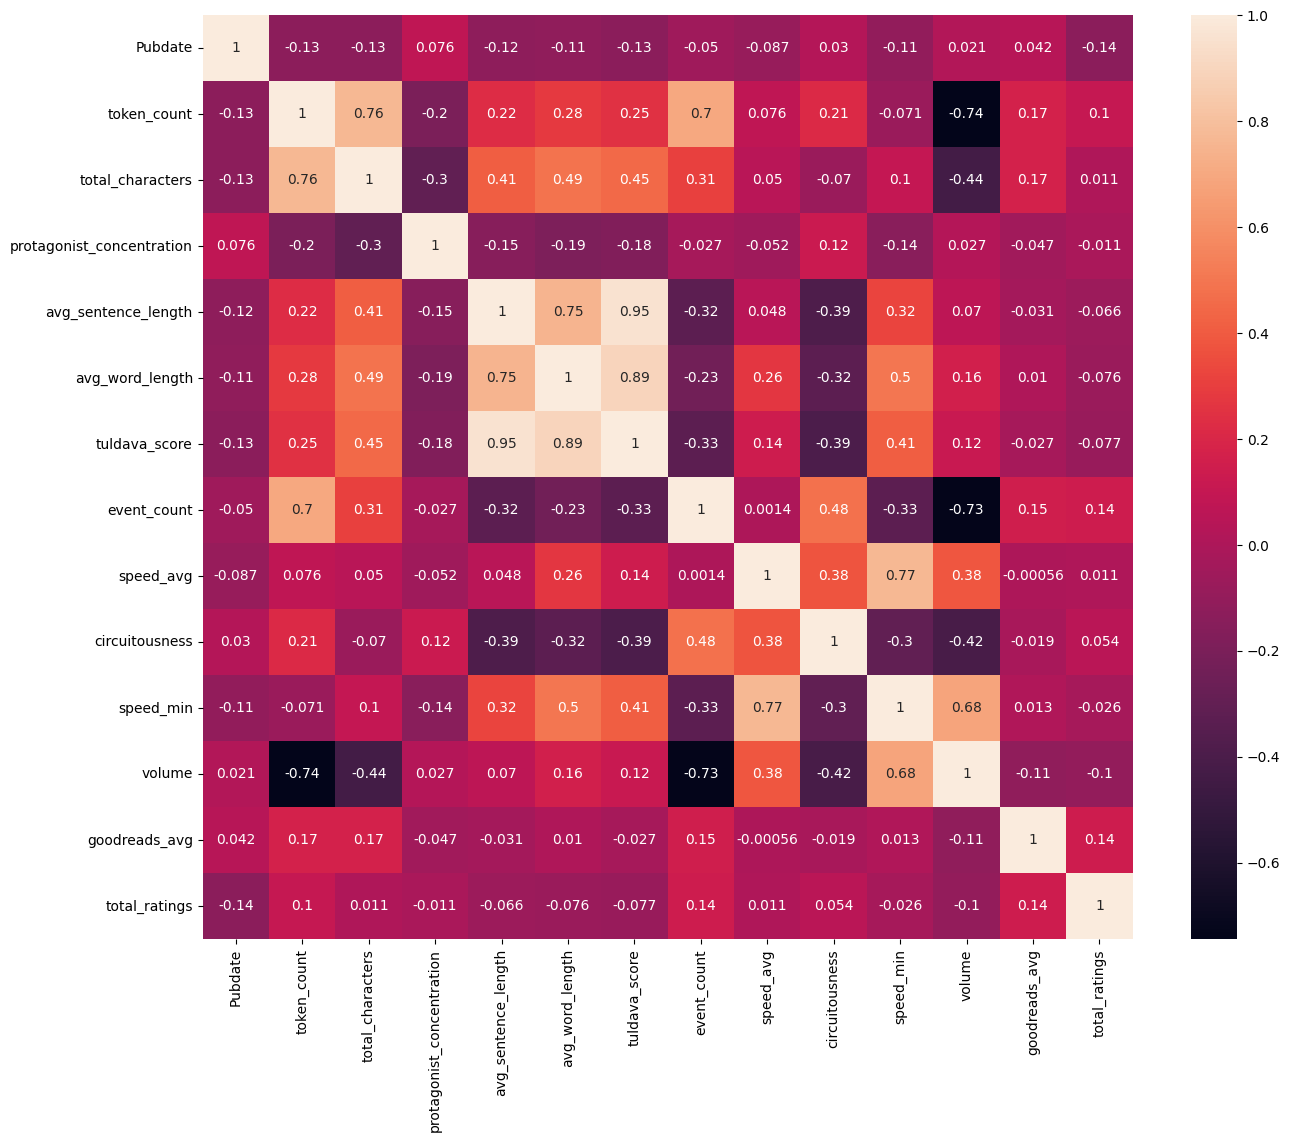

In [208]:
# count = 0
quantitative_conlit = conlit_df.loc[:, quantitative_cols]
# for columnName in quantitative_conlit:
#     for columnName2 in quantitative_conlit:
#       print(columnName, columnName2)
#       correlation = quantitative_conlit[columnName].corr(quantitative_conlit[columnName2])
#       print('Correlation : ', correlation, "\n")
#     if abs(correlation)>0.4: count +=1
# print("Number of columns with correlation >0.5 or <-0.5: ", count)

plt.figure(figsize=(15, 12))
sns.heatmap(quantitative_conlit.corr(), annot=True)
plt.show()

As we can see in the heatmap above, most of the correlations (especially with Goodreads average) are not particularly strong.

Lastly, let's do some quick tests on our remaining unexplored categorical variables.

In [209]:

anova_result = stats.f_oneway(*[df_clean[df_clean['WinnerShortlist'] == genre]['goodreads_avg'] for genre in df_clean['WinnerShortlist'].unique()])

print(f"ANOVA Test Results for Winner Shortlist:")
print(f"P-value: {anova_result.pvalue:.4e}\n")

print(f"t-test Results for Probability1P:")
ttest = stats.ttest_ind(a=conlit_df[conlit_df['Probability1P']=="first person"]['goodreads_avg'], b=conlit_df[conlit_df['Probability1P']=="third person"]['goodreads_avg'])
print("p-value: ", ttest.pvalue, "\n")

print(f"t-test Results for Category:")
ttest = stats.ttest_ind(a=conlit_df[conlit_df['Category']=="FIC"]['goodreads_avg'], b=conlit_df[conlit_df['Category']=="NON"]['goodreads_avg'])
print("p-value: ", ttest.pvalue)

ANOVA Test Results for Winner Shortlist:
P-value: 3.6229e-24

t-test Results for Probability1P:
p-value:  0.5753633005169063 

t-test Results for Category:
p-value:  1.339632278816258e-10


As we can see, Category (fiction or non-fiction) has a significantly low p-value. This is to be expected as we saw that non-fiction genres often had significantly different Goodreads averages compared to fiction genres during our genre analysis.

Winner Shortlist also has a p-value less than 0.05! Let's dig a little further with a Tukey test.

In [210]:
tukey_results = pairwise_tukeyhsd(conlit_df['goodreads_avg'], conlit_df['WinnerShortlist'], alpha=0.05)
print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
  NoPrize Shortlist  -0.2507    0.0 -0.3091 -0.1922   True
  NoPrize    Winner   -0.167 0.0021 -0.2827 -0.0514   True
Shortlist    Winner   0.0836 0.2737 -0.0439  0.2112  False
----------------------------------------------------------


We can see that books that have won or been shortlisted for prizes have significantly better Goodreads averages compared to books that did not win a prize. However, books that won prizes were not significantly better rated than books that were only shortlisted.

That concludes our analysis of our data and features!

# Primary Analysis with Visualization
Since we are predicting a continuous variable (Goodreads average rating), we will be testing both a polynomial regression model and a neural network model. Since our correlations were quite low, we do not have high hopes for the polynomial regression model, but we wanted to give it a try anyway.

Let's start by encoding our categorical data and normalizing our quantitative data.

In [211]:
winner_shortlist_mapping = {
    "Winner": 2,
    "Shortlist": 1,
    "NoPrize": 0
}
proportions = (conlit_df.groupby("Genre").size()) / (len(conlit_df))

conlit_df.drop(columns=["ID"], inplace=True)
conlit_df["WinnerShortlist"] = conlit_df["WinnerShortlist"].map(winner_shortlist_mapping)
conlit_df = pd.get_dummies(conlit_df, columns=["Category", "Author_Gender", "Probability1P"], dtype=int)
conlit_df["Genre"] = conlit_df["Genre"].apply(lambda x: proportions[x])

We used one-hot encoding for Gender, Category, and Probability1P.

As there were many different genres, we chose to use probability encoding to not increase the dimensionality of the dataset too much. The probabilities were all unique.

For WinnerShortlist we used label encoding.Since we typically thing of Winner as better than Shortlist and Shortlist as better than no-prize, we decided that the implied importance of the labels (2, 1, and 0 respectively) was not an issue.


In [212]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X, y = conlit_df.drop(columns=["goodreads_avg"]), conlit_df["goodreads_avg"]
X_scaled = scaler.fit_transform(X)

Next, since we didn't have very many stand out features, we opted to use PCA in order to help us choose a smaller subset of features.

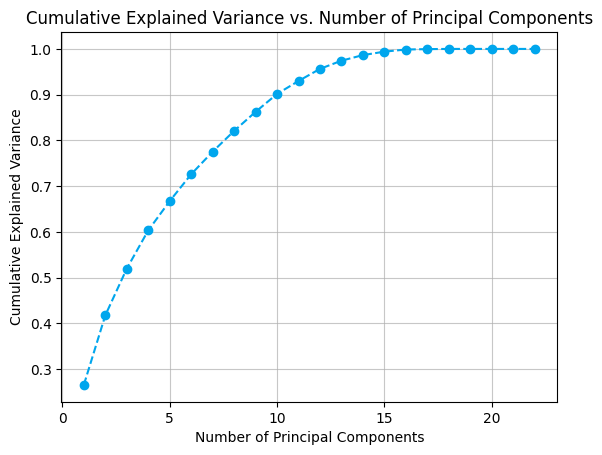

In [213]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='#00a6ed')
plt.grid(True, linestyle='-', alpha=0.7)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

Since 90% of the variability is explained by 10 of the features produced by the PCA, we will use 10 of these features for our analyis.

In [214]:
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

Now let's get started with our polynomial regression!

# Polynomial Regression

Degree: 2
Training - MSE: 0.0801, R^2: 0.3161
Testing - MSE: 0.1688, R^2: -0.1146



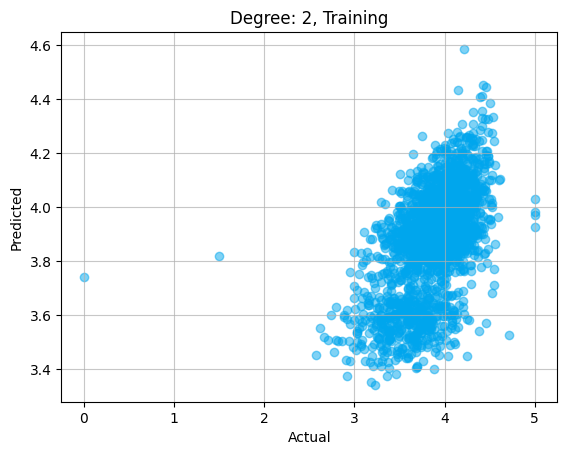

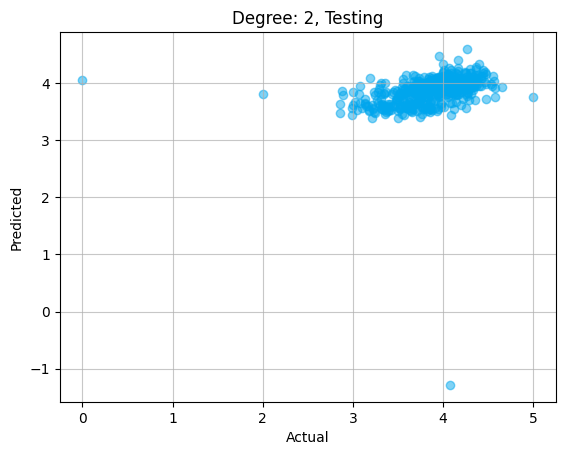

Degree: 3
Training - MSE: 0.0684, R^2: 0.4153
Testing - MSE: 6414.9161, R^2: -42359.4227



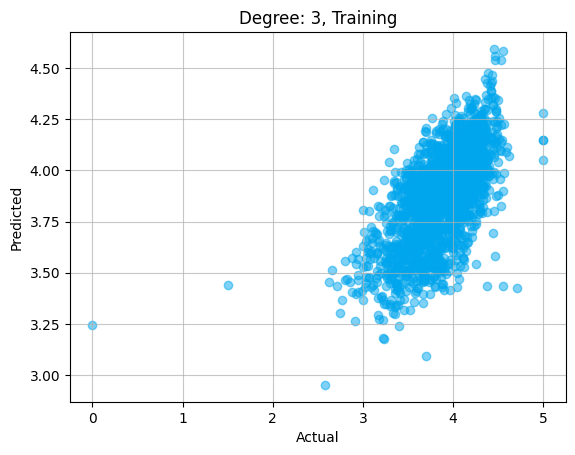

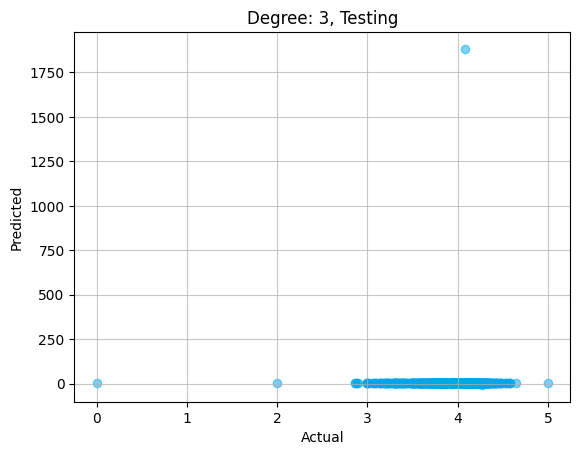

Degree: 4
Training - MSE: 0.0410, R^2: 0.6501
Testing - MSE: 32632291369.8709, R^2: -215484917085.2815



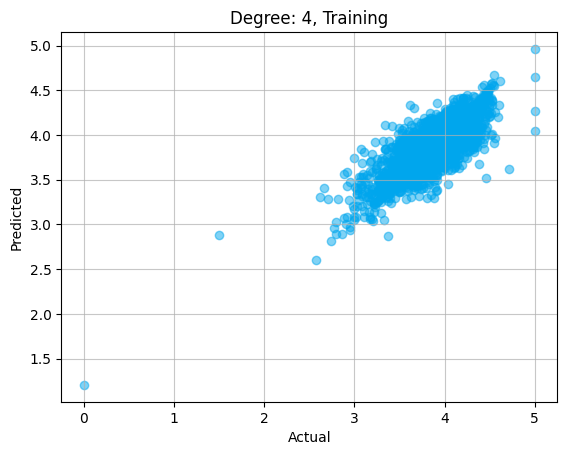

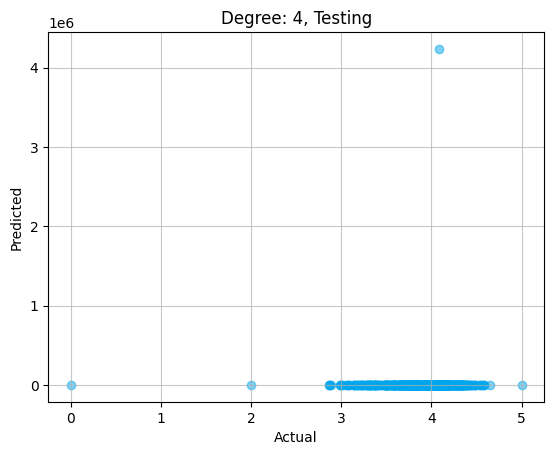

Degree: 5
Training - MSE: 0.0000, R^2: 1.0000
Testing - MSE: 24781186.4244, R^2: -163640726.5677



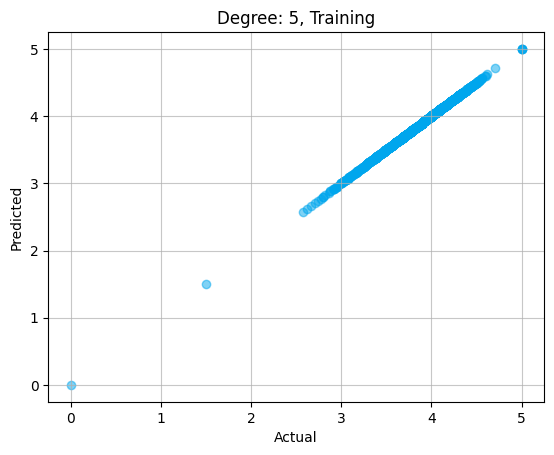

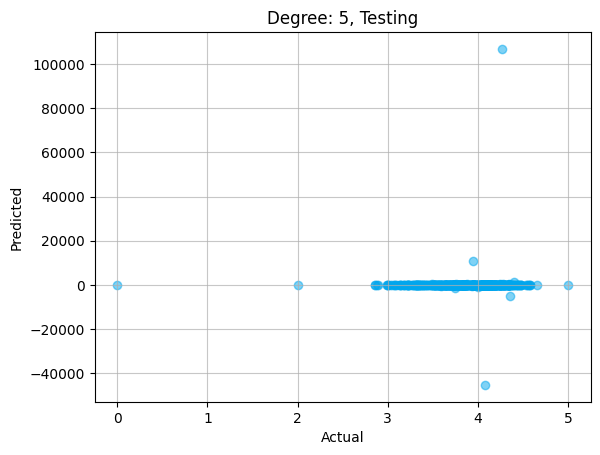

In [215]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

degrees = list(range(2, 6))

for d in degrees:
  model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  print(f"Degree: {d}")
  print(f"Training - MSE: {train_mse:.4f}, R^2: {train_r2:.4f}")
  print(f"Testing - MSE: {test_mse:.4f}, R^2: {test_r2:.4f}\n")

  plt.scatter(y_train, y_train_pred, alpha=0.5, color="#00a6ed")
  plt.grid(True, linestyle='-', alpha=0.7)
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title(f"Degree: {d}, Training")
  plt.show()

  plt.scatter(y_test, y_test_pred, alpha=0.5, color="#00a6ed")
  plt.grid(True, linestyle='-', alpha=0.7)
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title(f"Degree: {d}, Testing")
  plt.show()

Here we try degrees 2 through 4. We see that for degrees 2, 3, and 4, the model does not predict either the testing or the training data very well (as given by the low R^2 values), suggesting that the model is not picking up on patterns in the data. For degree 5, the model appears to overfit, as the training R^2 is excellent (all of the variation in Goodreads average can be explained by the model), but the testing R^2 is extremely poor.

This is all reflected in the Actual vs Predicted plots, where the training data has very accurate predictions (the points get closer to the line y=x), but the testing plots are hover around a horizontal line, indicating that the predictions remain the same even as the actual rating varies.

To combat overfitting, we'll try applying Lasso and Ridge regression.

In [216]:
from sklearn.linear_model import Lasso, Ridge

alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 5]

def test(model, degree, alpha, X_train, y_train):
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  print("{:10}{:10}{:25}{:25}{:25}{:25}".format(degree, alpha, train_mse, train_r2, test_mse, test_r2))


print("{:>62}".format("Lasso"))
print("=" * 120)
print("{:>10}{:>10}{:>25}{:>25}{:>25}{:>25}".format("Degree", "Alpha", "Train MSE", "Train R^2", "Test MSE", "Test R^2"))
print("-" * 120)
for d in degrees:
  for a in alphas:
    model = make_pipeline(PolynomialFeatures(degree=d), Lasso(alpha=a))
    test(model, d, a, X_train, y_train)


print("\n{:>62}".format("Ridge"))
print("=" * 120)
print("{:>10}{:>10}{:>25}{:>25}{:>25}{:>25}".format("Degree", "Alpha", "Train MSE", "Train R^2", "Test MSE", "Test R^2"))
print("-" * 120)
for d in degrees:
  for a in alphas:
    model = make_pipeline(PolynomialFeatures(degree=d), Ridge(alpha=a))
    test(model, d, a, X_train, y_train)

                                                         Lasso
    Degree     Alpha                Train MSE                Train R^2                 Test MSE                 Test R^2
------------------------------------------------------------------------------------------------------------------------
         2    0.0001      0.08033484646109368      0.31370111889530583      0.11837068836042026      0.21834793402397512


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.991e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         2     0.001      0.08083677247527724       0.3094131756539089      0.11901055326971392       0.2141226335275207
         2      0.01      0.08377208139177048       0.2843368941418558      0.11942040500986037      0.21141620794305593
         2       0.1      0.11124937025172221      0.04959900104700632      0.14658663872166605     0.032025997412518326
         2         1       0.1170551907818697                      0.0      0.15143714532131766   -3.963358713887644e-06
         2         5       0.1170551907818697                      0.0      0.15143714532131766   -3.963358713887644e-06


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.708e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         3    0.0001        0.071400014488267       0.3900311980071036      0.40955844838406413      -1.7044888540530092


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.701e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         3     0.001       0.0727206851939852        0.378748736316197       0.1539010296317252     -0.01627404075905714


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.018e+00, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         3      0.01      0.07890846599895186       0.3258866567823001      0.19436373958554784      -0.2834665465092354
         3       0.1      0.10177131100414227       0.1305698591889758      0.13358312971991507       0.1178937051782113
         3         1      0.11630698867581579     0.006391874645253259      0.15084812002367484    0.0038856215308558095
         3         5       0.1170551907818697                      0.0      0.15143714532131766   -3.963358713887644e-06


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.196e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         4    0.0001     0.055142171725182564       0.5289216022214767       21.423601278888963      -140.46916295106618


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.770e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         4     0.001      0.05826507639441289       0.5022426941921025       10.247001568604437        -66.6653152659827


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.414e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         4      0.01      0.07012117616238063      0.40095628656869897      0.15659073125625186     -0.03403528605374406


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e-01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         4       0.1       0.0946466458988497      0.19143572133232378      0.17929967067819713      -0.1839920841526148
         4         1      0.11379885812983076      0.02781878044269781      0.15046617230907405     0.006407784951106277
         4         5      0.11639976113403563     0.005599321511981947      0.15101782918321519    0.0027649596760740414


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.414e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         5    0.0001      0.03815918935724858       0.6740068586248553        9.480590210274789       -61.60437467398584


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.439e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         5     0.001      0.04190757714898174       0.6419844616111405       29.337656630626586      -192.72904081118986


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.533e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         5      0.01       0.0584855142370187       0.5003594984010113        29.48040086709281       -193.6716417953141


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.121e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         5       0.1      0.08464858043883496       0.2768489814639993      0.27515020125715195      -0.8169339575986247
         5         1      0.11060782977016412      0.05507966770751871      0.22196434704010634      -0.4657251118506758
         5         5      0.11467153170023733     0.020363548730395697      0.15261807287958218    -0.007802130949620123

                                                         Ridge
    Degree     Alpha                Train MSE                Train R^2                 Test MSE                 Test R^2
------------------------------------------------------------------------------------------------------------------------
         2    0.0001      0.08005313165586421      0.31610780247206793      0.16879050131263504     -0.11459556327346232
         2     0.001      0.08005313198344301       0.3161077996735693      0.16873444673157847     -0.11422541100268346
         2      0.01      0.08005316409506885      0.31610752534463415      0.16818112273

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.92389e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


         5    0.0001   5.0006859676469865e-05       0.9995727924636024        5108490.742323004      -33733538.933449745


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.36921e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


         5     0.001    0.0006966459397582577        0.994048568584571       16312050.677552428      -107715416.46544255


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.66713e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


         5      0.01    0.0031778000469544375       0.9728521219287386        2276065.783391385      -15029830.679851007
         5       0.1    0.0078087214214661305       0.9332902593271789        1613959.467995843      -10657660.706919193
         5         1     0.013521536254551174        0.884485803967905       296727.80789675826        -1959419.08353304
         5         5     0.018378183041995275       0.8429955739746502       44048.546190931105       -290870.3095301579


Here we tried applying both Lasso and Ridge regression for a variety of alpha values on degrees 2 through 5.

Let's look at Lasso regression first. While the results are an improvement upon before, we see that all of the R^2 values are still negative or close to zero. Our training R^2 is also much lower, indicating that while the model is no longer overfitting, it still isn't explaining the variation in Goodreads average very well, for any degree or alpha value. Another interesting note is that the model generally explains the training data better as the number of degrees increases, and the overfitting was greatest when we had degree 5 combined with low alpha values.

Next looking at Ridge regression: Ridge regression generally seemed to perform worse than Lasso regression, although it is still better than our original model. As values of alpha increased, overfitting generally decreased (as indicated by lower training R^2 and higher testing R^2). Overfitting also increased as the number of degrees increased. None of the alpha-degree combinations produced a model that explained the variation in Goodreads average particularly well.

Next let's move on to try Neural Networks!

# Neural Networks with Visualization
To prepare the dataset for our ML model, we encoded and normalized several features to make them suitable for numerical modeling. Categorical fields like WinnerShortlist were mapped to ordinal values to capture their ranking, while Category and Author_Gender were one-hot encoded to avoid introducing false orderings. We also replaced Genre with its frequency proportion to reflect its distribution across the dataset. Finally, we applied standard scaling to normalize all features, ensuring that no single variable dominated the model due to differences in scale.

In [217]:
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

batch_size = train_loader.batch_size
num_train_data = len(train_loader) * batch_size
num_test_data = len(test_loader) * batch_size
feat_dim = train_loader.dataset[0][0].shape[0]

print("Batch Size:", batch_size)
print("Number of Train Data:", num_train_data)
print("Number of Test Data:", num_test_data)
print("Feature Dimension:", feat_dim)

Batch Size: 32
Number of Train Data: 2208
Number of Test Data: 576
Feature Dimension: 10


In [218]:
# trains model for specified number of epochs
def train(model, criterion, epochs):
    optimizer = optim.Adam(model.parameters())
    losses = []

    for epoch in range(epochs):
        for batch_idx, (data, targets) in enumerate(train_loader):
            # forward pass
            pred = model(data)
            loss = criterion(pred, targets)
            # backward pass
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        losses.append(loss.item())
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    return losses

# finds the average training and testing loss
def average_losses(model, criterion):
    test_loss = 0.0
    for batch_idx, (data, targets) in enumerate(test_loader):
        loss = criterion(model(data), targets)
        test_loss += loss.item()
    test_loss = test_loss / len(test_loader)

    train_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        loss = criterion(model(data), targets)
        train_loss += loss.item()
    train_loss = train_loss / len(train_loader)

    print("Avg Train Loss:", train_loss)
    print("Avg Test Loss:", test_loss)

# plots losses over time
def visualize_losses(losses, criterion_name):
    plt.plot(losses, color="#00a6ed")
    plt.grid(True, linestyle='-', alpha=0.7)
    plt.title("Losses over Time")
    plt.xlabel("Time")
    plt.ylabel(f"Loss ({criterion_name})")
    plt.show()

def visualize_preds(name, model, xmin=None, xmax=None, ymin=None, ymax=None):
    pred = [x[0] for x in model(X_test_tensor).detach().numpy()]
    plt.scatter(y_test, pred, alpha=0.5, color="#00a6ed")
    plt.grid(True, linestyle='-', alpha=0.7)
    if xmin: plt.xlim(xmin, xmax)
    if ymin: plt.ylim(ymin, ymax)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(name)
    plt.show()

To explore how well a linear model could predict Goodreads ratings from our PCA-reduced features, we implemented polynomial regression with degrees ranging from 2 to 7. We wanted to assess whether adding non-linearity through polynomial terms could better capture complex relationships in the data.


In [219]:
class ThreeLPModel(nn.Module):
    def __init__(self):
        super(ThreeLPModel, self).__init__()
        self.layer1 = nn.Linear(10, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return torch.relu(self.layer3(x))

mse = nn.MSELoss()
three_layer_model = ThreeLPModel()
three_layer_losses = train(three_layer_model, mse, 100)

Epoch 1/100, Loss: 2.8850185871124268


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([23])) that is different to the input size (torch.Size([23, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 2/100, Loss: 0.2862606346607208
Epoch 3/100, Loss: 0.3051370680332184
Epoch 4/100, Loss: 0.19057215750217438
Epoch 5/100, Loss: 0.16401326656341553
Epoch 6/100, Loss: 0.09780047833919525
Epoch 7/100, Loss: 0.169870987534523
Epoch 8/100, Loss: 0.10908439010381699
Epoch 9/100, Loss: 0.0946904793381691
Epoch 10/100, Loss: 0.12130408734083176
Epoch 11/100, Loss: 0.0892471894621849
Epoch 12/100, Loss: 0.122682124376297
Epoch 13/100, Loss: 0.1144365444779396
Epoch 14/100, Loss: 0.09300751239061356
Epoch 15/100, Loss: 0.06833130121231079
Epoch 16/100, Loss: 0.0853068083524704
Epoch 17/100, Loss: 0.1871638298034668
Epoch 18/100, Loss: 0.09877385944128036
Epoch 19/100, Loss: 0.10251282155513763
Epoch 20/100, Loss: 0.10406603664159775
Epoch 21/100, Loss: 0.08494886755943298
Epoch 22/100, Loss: 0.12052367627620697
Epoch 23/100, Loss: 0.11695940047502518
Epoch 24/100, Loss: 0.08992569893598557
Epoch 25/100, Loss: 0.10553311556577682
Epoch 26/100, Loss: 0.07279326766729355
Epoch 27/100, Loss:

Through 100 epochs, the model was updated using gradient descent. After each epoch, we recorded the current batch’s training loss to track performance over time. As training progressed, loss values somewhat stabilized, indicating the model was learning to minimize error on the training data.


The graph below shows the model’s training loss decreasing significantly over the first few epochs and then leveling off. This pattern suggests that the model quickly learned patterns and adjusted weights accordingly.

Avg Train Loss: 0.11834790309270223
Avg Test Loss: 0.15697938038243187


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


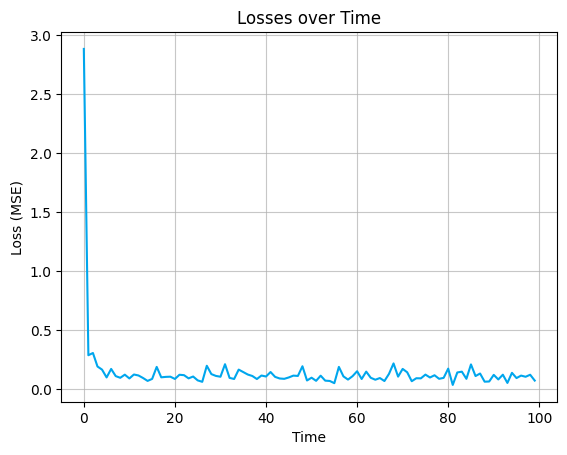

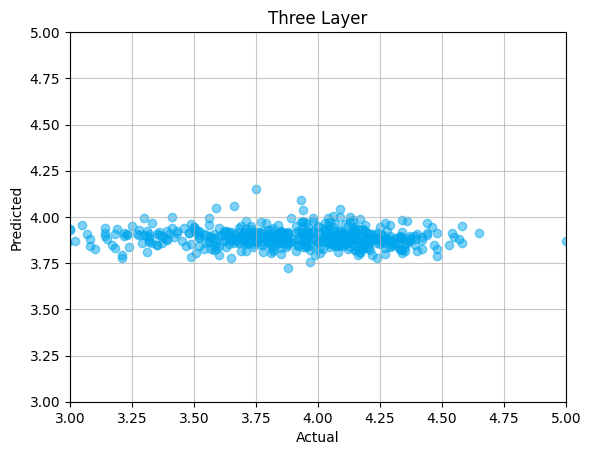

In [220]:
average_losses(three_layer_model, mse)
visualize_losses(three_layer_losses, "MSE")
visualize_preds("Three Layer", three_layer_model, 3, 5, 3, 5)

After testing a 3-layer neural network, we decided to test a 4-layer neural network with 2 128-node hidden layers to see if an increased model depth could better capture the relationships between features and Goodreads ratings. We defined a FourLPModel neural network model using PyTorch, which includes 3 ReLU-activated hidden layers and one output layer that has a single continuous value. We continued to use Mean Squared Error as our loss function and Adam as the optimizer.

In [221]:
class FourLPModel(nn.Module):
    def __init__(self):
        super(FourLPModel, self).__init__()
        self.layer1 = nn.Linear(10, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        return torch.relu(self.layer4(x))

four_layer_model = FourLPModel()
four_layer_losses = train(four_layer_model, mse, 100)

Epoch 1/100, Loss: 0.5822445154190063
Epoch 2/100, Loss: 0.20951013267040253
Epoch 3/100, Loss: 0.13184499740600586
Epoch 4/100, Loss: 0.15205326676368713
Epoch 5/100, Loss: 0.17362292110919952
Epoch 6/100, Loss: 0.18664617836475372
Epoch 7/100, Loss: 0.11085429787635803
Epoch 8/100, Loss: 0.13915131986141205
Epoch 9/100, Loss: 0.06198052316904068
Epoch 10/100, Loss: 0.09250558167695999
Epoch 11/100, Loss: 0.07887890934944153
Epoch 12/100, Loss: 0.11324859410524368
Epoch 13/100, Loss: 0.08986310660839081
Epoch 14/100, Loss: 0.08951925486326218
Epoch 15/100, Loss: 0.11867281794548035
Epoch 16/100, Loss: 0.11929214745759964
Epoch 17/100, Loss: 0.10247519612312317
Epoch 18/100, Loss: 0.1270374059677124
Epoch 19/100, Loss: 0.14033378660678864
Epoch 20/100, Loss: 0.12060630321502686
Epoch 21/100, Loss: 0.07656413316726685
Epoch 22/100, Loss: 0.1313728392124176
Epoch 23/100, Loss: 0.13919153809547424
Epoch 24/100, Loss: 0.10424729436635971
Epoch 25/100, Loss: 0.15657486021518707
Epoch 26/100

Through 100 epochs, the model learned to minimize MSE loss. The loss generally decreased over time, with the final average losses being 0.12 on training data and 0.16 on test data, similar to the previous model.

The graph below, just like the previous model, shows a significant training loss over the first few epochs and then leveling off.

Avg Train Loss: 0.11992121325886768
Avg Test Loss: 0.15968303837709957


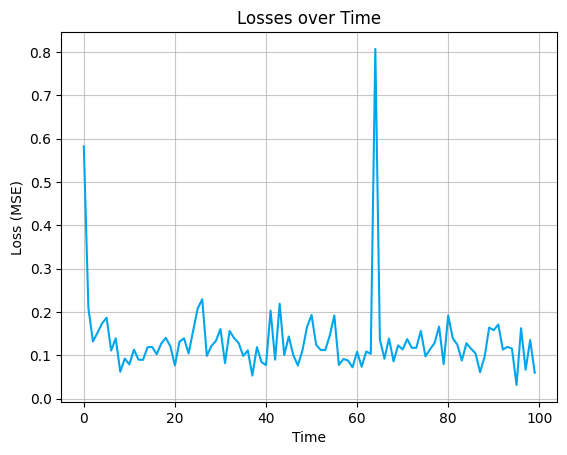

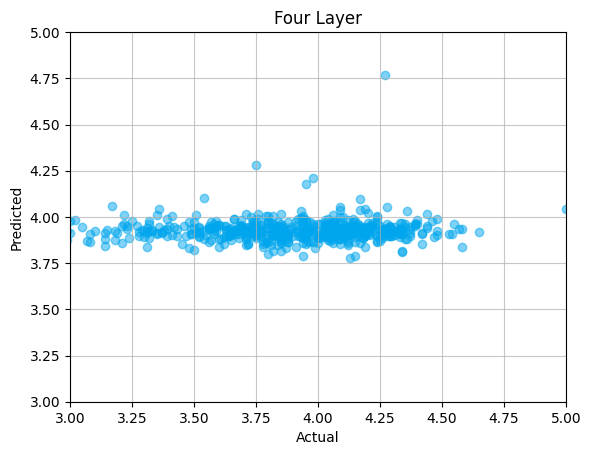

In [222]:
average_losses(four_layer_model, mse)
visualize_losses(four_layer_losses, "MSE")
visualize_preds("Four Layer", four_layer_model, 3, 5, 3, 5)


As we can see, the loss is relatively similar, and we have the same issue with our model guessing around an average (resulting in the horizontal line in the graph). Our model isn't really understanding the pattenrs of the data. Next let's try a model with more nodes in each layer.

So now a wider neural network with 512 unit first layer with 4 connected layers with ReLU activations. We continued to use Mean Square Error as our loss function and Adam as the optimizer.

In [223]:
class BigModel(nn.Module):
    def __init__(self):
        super(BigModel, self).__init__()
        self.layer1 = nn.Linear(10, 512)
        self.layer2 = nn.Linear(512, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        return torch.relu(self.layer4(x))

big_model = BigModel()
big_model_losses = train(big_model, mse, 100)

Epoch 1/100, Loss: 0.23210828006267548
Epoch 2/100, Loss: 0.27349936962127686
Epoch 3/100, Loss: 0.09387585520744324
Epoch 4/100, Loss: 0.19303537905216217
Epoch 5/100, Loss: 0.08419276773929596
Epoch 6/100, Loss: 0.11417696624994278
Epoch 7/100, Loss: 0.21098169684410095
Epoch 8/100, Loss: 0.23080015182495117
Epoch 9/100, Loss: 0.12279365956783295
Epoch 10/100, Loss: 0.11346004158258438
Epoch 11/100, Loss: 0.08794837445020676
Epoch 12/100, Loss: 0.08613840490579605
Epoch 13/100, Loss: 0.2065420150756836
Epoch 14/100, Loss: 0.13346552848815918
Epoch 15/100, Loss: 0.10331661254167557
Epoch 16/100, Loss: 0.12995916604995728
Epoch 17/100, Loss: 0.1529548168182373
Epoch 18/100, Loss: 0.0987214520573616
Epoch 19/100, Loss: 0.07862775027751923
Epoch 20/100, Loss: 0.06682635843753815
Epoch 21/100, Loss: 0.09913463890552521
Epoch 22/100, Loss: 0.15534263849258423
Epoch 23/100, Loss: 0.08454010635614395
Epoch 24/100, Loss: 0.10345246642827988
Epoch 25/100, Loss: 0.07037496566772461
Epoch 26/100

Despite its larger capacity, the model failed to converge meaningfully. Both training and test losses remained very high (around 15 MSE) and fluctuated wildly from epoch to epoch, indicating that the model was either not learning at all, or stuck in a poor local minimum.

There is very high volatility across 100 epochs. This confirm that the model struggled to reduce error and is unable to extract meaningful patterns from the training data
The scatter plot of predicted vs actual values shows a flat horizontal line at 0 meaning the model is outputting nearly the same (and wrong) predictions for every input. This means that the learning didn’t really take place! The model failed to adjust weights in a meaningful way. Bigger != Better

Avg Train Loss: 0.1496389946643857
Avg Test Loss: 0.1806586922870742


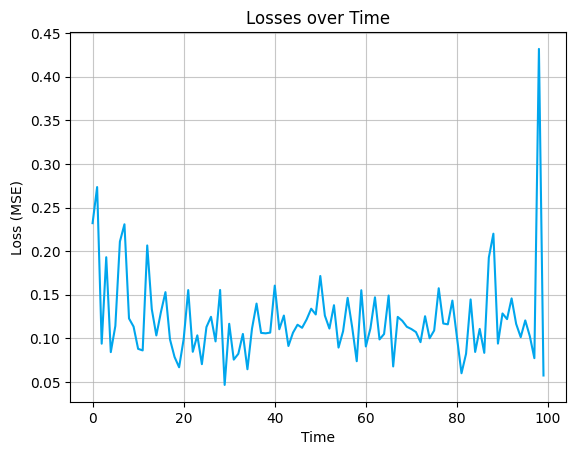

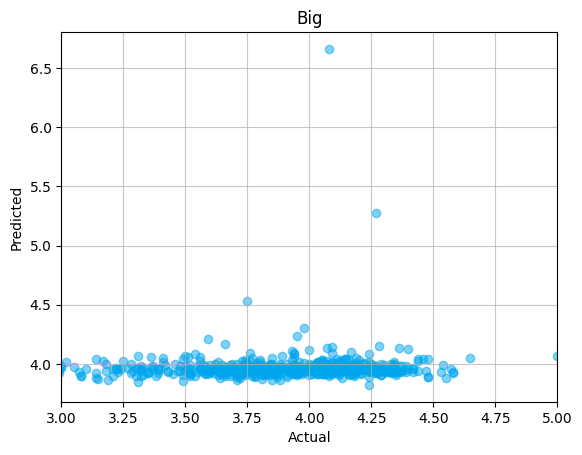

In [224]:
average_losses(big_model, mse)
visualize_losses(big_model_losses, "MSE")
visualize_preds("Big", big_model, 3, 5)

We still have the same issue! Let's try one more "mega" neural network, with 9 layers and more nodes in each layer. We'll also user the Huber loss function instead of MSE, as MSE gives more weight to outliers.
This has 9 fully connected layers, expanded to 1024 units and gradually shrunk to 1 output neuron. ReLU was used as the activation function.

In [225]:
class NineLPModel(nn.Module):
    def __init__(self):
        super(NineLPModel, self).__init__()
        self.layer1 = nn.Linear(10, 128)
        self.layer2 = nn.Linear(128, 512)
        self.layer3 = nn.Linear(512, 1024)
        self.layer4 = nn.Linear(1024, 1024)
        self.layer5 = nn.Linear(1024, 512)
        self.layer6 = nn.Linear(512, 128)
        self.layer7 = nn.Linear(128, 64)
        self.layer8 = nn.Linear(64, 32)
        self.layer9 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x))
        x = torch.relu(self.layer6(x))
        x = torch.relu(self.layer7(x))
        x = torch.relu(self.layer8(x))
        return torch.relu(self.layer9(x))

huber = nn.HuberLoss()
nine_layer_model = NineLPModel()
nine_layer_losses = train(nine_layer_model, huber, 100)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:1102: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:1102: UserWarning: Using a target size (torch.Size([23])) that is different to the input size (torch.Size([23, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)


Epoch 1/100, Loss: 0.12075400352478027
Epoch 2/100, Loss: 0.07249672710895538
Epoch 3/100, Loss: 0.07831000536680222
Epoch 4/100, Loss: 0.08116505295038223
Epoch 5/100, Loss: 0.08306274563074112
Epoch 6/100, Loss: 0.08256624639034271
Epoch 7/100, Loss: 0.0646730586886406
Epoch 8/100, Loss: 0.0655953511595726
Epoch 9/100, Loss: 0.12464460730552673
Epoch 10/100, Loss: 0.08275648206472397
Epoch 11/100, Loss: 0.04949774593114853
Epoch 12/100, Loss: 0.081415094435215
Epoch 13/100, Loss: 0.06838061660528183
Epoch 14/100, Loss: 0.10157632827758789
Epoch 15/100, Loss: 0.15154407918453217
Epoch 16/100, Loss: 0.06353327631950378
Epoch 17/100, Loss: 0.06066906079649925
Epoch 18/100, Loss: 0.061129868030548096
Epoch 19/100, Loss: 0.08784587681293488
Epoch 20/100, Loss: 0.04335922747850418
Epoch 21/100, Loss: 0.09378404915332794
Epoch 22/100, Loss: 0.05679222196340561
Epoch 23/100, Loss: 0.05345004424452782
Epoch 24/100, Loss: 0.07450492680072784
Epoch 25/100, Loss: 0.040673598647117615
Epoch 26/10

Despite the model’s depth and use of huber loss, training failed to converge effectively. Loss fluctuated around 3.4 with no clear downward trend. The average training and test losses were the same indicating that the model never learned. It seemed it defaulted to the median outputting similar constant values regardless of the input.

The losses over time plot shows higher variance and no improvement throughout the 100 epochs. The scatterplot shows the same issues as the 3rd big model. All predictions were the same regardless of input value.

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:1102: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)


Avg Train Loss: 0.07339560483460841
Avg Test Loss: 0.08714589041968186


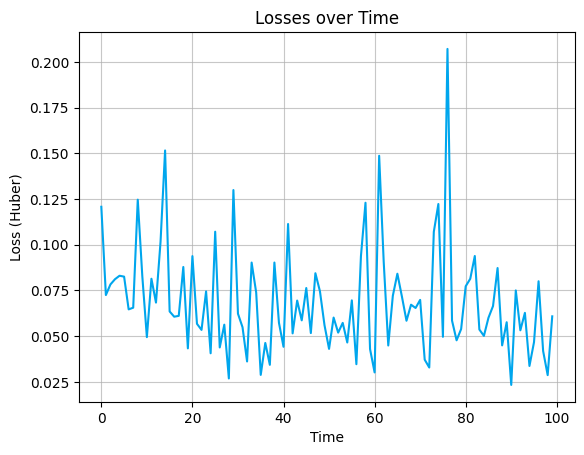

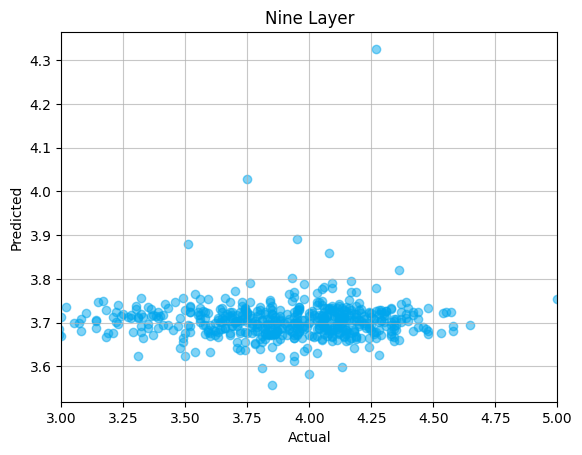

In [226]:
average_losses(nine_layer_model, huber)
visualize_losses(nine_layer_losses, "Huber")
visualize_preds("Nine Layer", nine_layer_model, 3, 5)

We see that the loss technically decreased, but this is because the model is predicting values even closer to an average. It is still not accurately identifying patterns in the data, as our Actual vs Predicted plot is an (even tighter) horizontal line.

# Cherry Picking

As a last attempt at getting better predictions, let's try doing ML predictions on cherry-picked data without PCA.

The following qualitative features showed significant difference between categories:
- Category
- Genre
- WinnerShortlist

And the following quantitative features had at least a $\pm$0.1 correlation with  goodreads_avg:
- token_count
- total_characters
- event_count
- volume
- total_ratings

In [227]:
columns = [
    "Category_FIC",
    "Category_NON",
    "Genre",
    "WinnerShortlist",
    "token_count",
    "total_characters",
    "event_count",
    "volume",
    "total_ratings",
    "goodreads_avg"
]

cherry_picked = conlit_df[columns]
cherry_picked

,Category_FIC,Category_NON,Genre,WinnerShortlist,token_count,total_characters,event_count,volume,total_ratings,goodreads_avg
0,1,0,0.064023,0,80392,34,4796,-3.0142,42102.0,4.13
1,1,0,0.081120,0,103230,34,4039,-2.9521,5136.0,3.67
2,1,0,0.090578,0,124445,27,5129,-2.8300,1480498.0,3.93
3,1,0,0.081120,0,67075,14,3479,-2.8989,61346.0,3.56
4,1,0,0.151692,0,88042,24,6314,-2.8866,145.0,2.58
...,...,...,...,...,...,...,...,...,...,...
2749,0,1,0.070207,0,174567,161,5310,-2.9783,1798.0,4.22
2750,0,1,0.070207,0,133983,100,3561,-3.0649,33198.0,4.12
2751,0,1,0.070207,0,314641,220,8682,-3.2655,6075.0,3.82
2752,0,1,0.070207,0,64409,74,1458,-2.8017,10699.0,3.75


In [228]:
X, y = cherry_picked.drop(columns=["goodreads_avg"]), cherry_picked["goodreads_avg"]
X_scaled = scaler.fit_transform(X)

Great. Let's go ahead and do all of the same things we did earlier, with minor tweaks to fit the number of inputs.

## Polynomial Regression

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = list(range(2, 6))

for d in degrees:
  model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  print(f"Degree: {d}")
  print(f"Training - MSE: {train_mse:.4f}, R^2: {train_r2:.4f}")
  print(f"Testing - MSE: {test_mse:.4f}, R^2: {test_r2:.4f}\n")

Degree: 2
Training - MSE: 0.0869, R^2: 0.2574
Testing - MSE: 0.1266, R^2: 0.1642

Degree: 3
Training - MSE: 0.0959, R^2: 0.1808
Testing - MSE: 0.1697, R^2: -0.1207

Degree: 4
Training - MSE: 0.1056, R^2: 0.0982
Testing - MSE: 0.9915, R^2: -5.5471

Degree: 5
Training - MSE: 0.1086, R^2: 0.0720
Testing - MSE: 1129.3628, R^2: -7456.6634



Using Lasso and Ridge

In [230]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 5]

def test(model, degree, alpha, X_train, y_train):
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  print("{:10}{:10}{:25}{:25}{:25}{:25}".format(degree, alpha, train_mse, train_r2, test_mse, test_r2))


print("{:>62}".format("Lasso"))
print("=" * 120)
print("{:>10}{:>10}{:>25}{:>25}{:>25}{:>25}".format("Degree", "Alpha", "Train MSE", "Train R^2", "Test MSE", "Test R^2"))
print("-" * 120)
for d in degrees:
  for a in alphas:
    model = make_pipeline(PolynomialFeatures(degree=d), Lasso(alpha=a))
    test(model, d, a, X_train, y_train)


print("\n{:>62}".format("Ridge"))
print("=" * 120)
print("{:>10}{:>10}{:>25}{:>25}{:>25}{:>25}".format("Degree", "Alpha", "Train MSE", "Train R^2", "Test MSE", "Test R^2"))
print("-" * 120)
for d in degrees:
  for a in alphas:
    model = make_pipeline(PolynomialFeatures(degree=d), Ridge(alpha=a))
    test(model, d, a, X_train, y_train)

                                                         Lasso
    Degree     Alpha                Train MSE                Train R^2                 Test MSE                 Test R^2
------------------------------------------------------------------------------------------------------------------------
         2    0.0001       0.0828329283372489      0.29236005867004555      0.11884376770870249      0.21522398961613787


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.177e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.488e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         2     0.001      0.08439842943065369       0.2789860161953117      0.12088898919264539      0.20171852115561095
         2      0.01      0.08747524801274124       0.2527008206261452      0.12417507783501598      0.18001907839771802


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.658e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.724e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.822e+01, tolerance: 2.574e

         2       0.1      0.08796369385172606      0.24852803823416203      0.12535754528935564      0.17221074221722932
         2         1      0.08916939178342145       0.2382277865012662      0.12961933571984174      0.14406832502858202
         2         5      0.08926774951829902      0.23738751846854955      0.12981135416985054      0.14280034542794062


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.877e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.778e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         3    0.0001      0.07961111373946506       0.3198839521109408      0.21176814625223622     -0.39839525577449897


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.853e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         3     0.001      0.08020079103338823      0.31484635155701046      0.22389414181381165     -0.47846836858652875


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.904e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         3      0.01      0.08083816595354935      0.30940127119873007      0.23254867555062952      -0.5356179405721628


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.960e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         3       0.1      0.08103546770164466      0.30771572656993207      0.23560357939328871      -0.5557907716424864


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.113e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         3         1       0.0821696212157158       0.2980266772719422       0.3283900831171254      -1.1684995708816732


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.197e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         3         5      0.08291881735573063      0.29162631061574706       0.3184926662749063       -1.103142712442272


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.554e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         4    0.0001      0.07761145514146053       0.3369669928940775       3.1902869234785673       -20.06682320880325


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.607e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         4     0.001      0.07789576167719985      0.33453816821880855        2.690985962260189      -16.769726323704297


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.680e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         4      0.01       0.0785540396847766       0.3289145132302532        1.894521746664368      -11.510333916515991


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.732e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         4       0.1      0.07912592187640598      0.32402893585594383       1.1082766015102066       -6.318422383467373


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.828e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         4         1      0.07968371772052327       0.3192636978482015       1.7506624544120424      -10.560369744165378


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.903e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         4         5      0.08033443669729873       0.3137046194986727       2.3787919541655715      -14.708176333647053


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.371e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         5    0.0001      0.07596042788699472      0.35107168353989826        5.082764297823795       -32.56365726425554


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.410e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         5     0.001      0.07621167715606622       0.3489252663892082        6.227767588254585      -40.124601615524796


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.482e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         5      0.01      0.07682792770629425      0.34366065107303323        4.875548996160059      -31.195326380226803


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.545e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         5       0.1      0.07739101034931486       0.3388502480549397        6.711912161429275       -43.32161441569378


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.615e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(


         5         1      0.07789101249225527       0.3345787404045686       12.213471113606914          -79.65075113546


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.669e+01, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.20156e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.32899e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.32946e-29): result may not be accurate.
  return linalg.solve(A, Xy, ass

         5         5      0.07835463676765596       0.3306180081012515       15.285920364323825       -99.93944200728214

                                                         Ridge
    Degree     Alpha                Train MSE                Train R^2                 Test MSE                 Test R^2
------------------------------------------------------------------------------------------------------------------------
         2    0.0001      0.08116117983327459       0.3066417705087763      0.12166950319220601       0.1965644548176494
         2     0.001      0.08149375562098408      0.30380058264271026      0.12089476022725783       0.2016804125563444
         2      0.01      0.08192417163230763      0.30012354783162176      0.12045584147401509       0.2045787800071036
         2       0.1      0.08241860358877999       0.2958996261655271      0.12062702567615129       0.2034483778178826
         2         1       0.0830152829553711       0.2908022070540329      0.12176546107

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.44303e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


         3    0.0001      0.08227275856875774       0.2971455770631173      0.26511867070373646      -0.7506914892089529
         3     0.001      0.08227275855925015      0.29714557714434053       0.2651186722361521      -0.7506914993281459
         3      0.01      0.08227275855539722        0.297145577177256      0.26511867582635895      -0.7506915230358109
         3       0.1      0.08227275856243879          0.2971455771171      0.26511866724078853      -0.7506914663416329
         3         1      0.08227275846791317      0.29714557792463026       0.2651186558826948      -0.7506913913393027
         3         5      0.08227275808809181        0.297145581169436       0.2651185801682891      -0.7506908913648374
         4    0.0001      0.14349127927126915     -0.22584294052078913       487.49603547895833       -3218.143933057182
         4     0.001      0.14349127927126915     -0.22584294052078913       487.49603547895833       -3218.143933057182
         4      0.01      0.1434

## Neural Networks

### Using MSELoss

In [231]:
X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

batch_size = train_loader.batch_size
num_train_data = len(train_loader) * batch_size
num_test_data = len(test_loader) * batch_size
feat_dim = train_loader.dataset[0][0].shape[0]

print("Batch Size:", batch_size)
print("Number of Train Data:", num_train_data)
print("Number of Test Data:", num_test_data)
print("Feature Dimension:", feat_dim)

Batch Size: 32
Number of Train Data: 2208
Number of Test Data: 576
Feature Dimension: 9


Three layer model

In [232]:
class CherryThreeLP(nn.Module):
    def __init__(self):
        super(CherryThreeLP, self).__init__()
        self.layer1 = nn.Linear(9, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return torch.relu(self.layer3(x))

mse = nn.MSELoss()
cherry_three_layer = CherryThreeLP()
cherry_3lp_losses = train(cherry_three_layer, mse, 100)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([23])) that is different to the input size (torch.Size([23, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Loss: 16.02914810180664
Epoch 2/100, Loss: 15.115013122558594
Epoch 3/100, Loss: 14.604087829589844
Epoch 4/100, Loss: 15.295289993286133
Epoch 5/100, Loss: 14.97646427154541
Epoch 6/100, Loss: 14.818534851074219
Epoch 7/100, Loss: 15.344736099243164
Epoch 8/100, Loss: 15.441926002502441
Epoch 9/100, Loss: 15.59146499633789
Epoch 10/100, Loss: 14.427949905395508
Epoch 11/100, Loss: 14.948039054870605
Epoch 12/100, Loss: 14.696861267089844
Epoch 13/100, Loss: 15.292104721069336
Epoch 14/100, Loss: 16.004764556884766
Epoch 15/100, Loss: 15.149994850158691
Epoch 16/100, Loss: 15.128144264221191
Epoch 17/100, Loss: 14.501978874206543
Epoch 18/100, Loss: 14.645538330078125
Epoch 19/100, Loss: 15.902046203613281
Epoch 20/100, Loss: 15.162595748901367
Epoch 21/100, Loss: 15.236894607543945
Epoch 22/100, Loss: 15.17119026184082
Epoch 23/100, Loss: 15.439140319824219
Epoch 24/100, Loss: 14.84360408782959
Epoch 25/100, Loss: 15.345012664794922
Epoch 26/100, Loss: 15.764581680297852


Avg Train Loss: 15.203127266704172
Avg Test Loss: 15.235178099738228


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


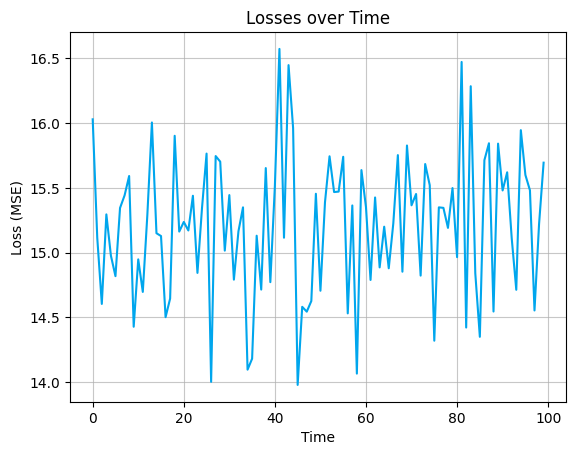

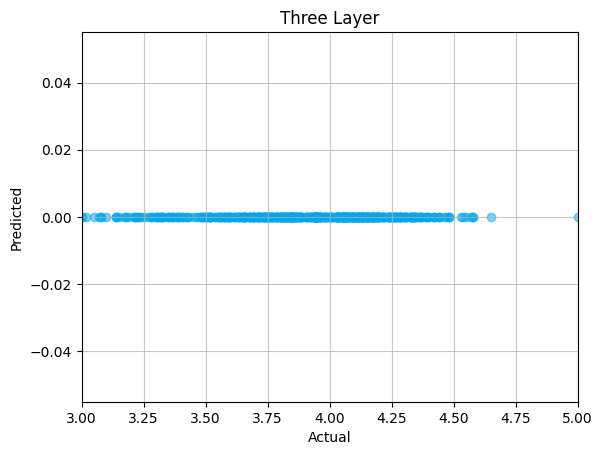

In [233]:
average_losses(cherry_three_layer, mse)
visualize_losses(cherry_3lp_losses, "MSE")
visualize_preds("Three Layer", cherry_three_layer, 3, 5)

Four layer model

In [234]:
class CherryFourLP(nn.Module):
    def __init__(self):
        super(CherryFourLP, self).__init__()
        self.layer1 = nn.Linear(9, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        return torch.relu(self.layer4(x))

cherry_four_layer = CherryFourLP()
cherry_4lp_losses = train(cherry_four_layer, mse, 100)

Epoch 1/100, Loss: 16.23932647705078
Epoch 2/100, Loss: 14.322909355163574
Epoch 3/100, Loss: 15.129087448120117
Epoch 4/100, Loss: 15.763928413391113
Epoch 5/100, Loss: 16.062274932861328
Epoch 6/100, Loss: 14.212726593017578
Epoch 7/100, Loss: 14.32300853729248
Epoch 8/100, Loss: 15.092401504516602
Epoch 9/100, Loss: 15.692047119140625
Epoch 10/100, Loss: 15.912886619567871
Epoch 11/100, Loss: 14.957687377929688
Epoch 12/100, Loss: 15.42536449432373
Epoch 13/100, Loss: 15.445516586303711
Epoch 14/100, Loss: 16.02788734436035
Epoch 15/100, Loss: 14.815738677978516
Epoch 16/100, Loss: 15.226774215698242
Epoch 17/100, Loss: 14.530921936035156
Epoch 18/100, Loss: 14.0648775100708
Epoch 19/100, Loss: 14.76525592803955
Epoch 20/100, Loss: 14.950238227844238
Epoch 21/100, Loss: 15.698713302612305
Epoch 22/100, Loss: 14.561470031738281
Epoch 23/100, Loss: 15.664928436279297
Epoch 24/100, Loss: 15.46162223815918
Epoch 25/100, Loss: 15.740877151489258
Epoch 26/100, Loss: 15.449639320373535
Epo

Avg Train Loss: 15.207842508951822
Avg Test Loss: 15.235178099738228


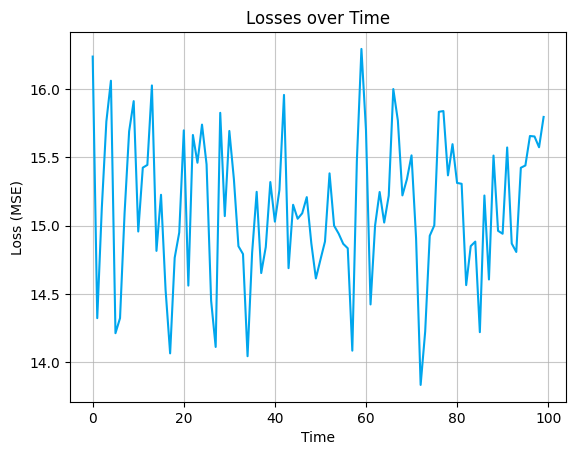

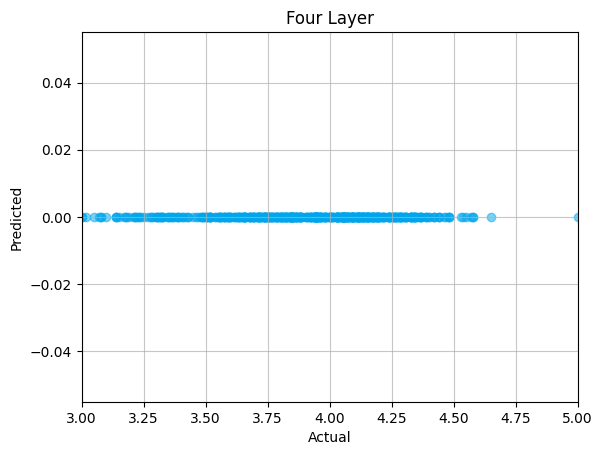

In [235]:
average_losses(cherry_four_layer, mse)
visualize_losses(cherry_4lp_losses, "MSE")
visualize_preds("Four Layer", cherry_four_layer, 3, 5)

Big model

In [236]:
class CherryBig(nn.Module):
    def __init__(self):
        super(CherryBig, self).__init__()
        self.layer1 = nn.Linear(9, 512)
        self.layer2 = nn.Linear(512, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        return torch.relu(self.layer4(x))

cherry_big_model = CherryBig()
cherry_biglp_losses = train(cherry_big_model, mse, 100)

Epoch 1/100, Loss: 15.265756607055664
Epoch 2/100, Loss: 15.00175666809082
Epoch 3/100, Loss: 16.635156631469727
Epoch 4/100, Loss: 14.60040283203125
Epoch 5/100, Loss: 15.740386009216309
Epoch 6/100, Loss: 15.192482948303223
Epoch 7/100, Loss: 15.100299835205078
Epoch 8/100, Loss: 14.594511985778809
Epoch 9/100, Loss: 14.563000679016113
Epoch 10/100, Loss: 15.46742057800293
Epoch 11/100, Loss: 14.646251678466797
Epoch 12/100, Loss: 15.317546844482422
Epoch 13/100, Loss: 15.018651962280273
Epoch 14/100, Loss: 14.905913352966309
Epoch 15/100, Loss: 14.087156295776367
Epoch 16/100, Loss: 15.631839752197266
Epoch 17/100, Loss: 15.366482734680176
Epoch 18/100, Loss: 15.595114707946777
Epoch 19/100, Loss: 14.811222076416016
Epoch 20/100, Loss: 15.912269592285156
Epoch 21/100, Loss: 15.874283790588379
Epoch 22/100, Loss: 15.915273666381836
Epoch 23/100, Loss: 14.571887016296387
Epoch 24/100, Loss: 15.159095764160156
Epoch 25/100, Loss: 14.278616905212402
Epoch 26/100, Loss: 14.97438812255859

Avg Train Loss: 15.208583265111066
Avg Test Loss: 15.235178099738228


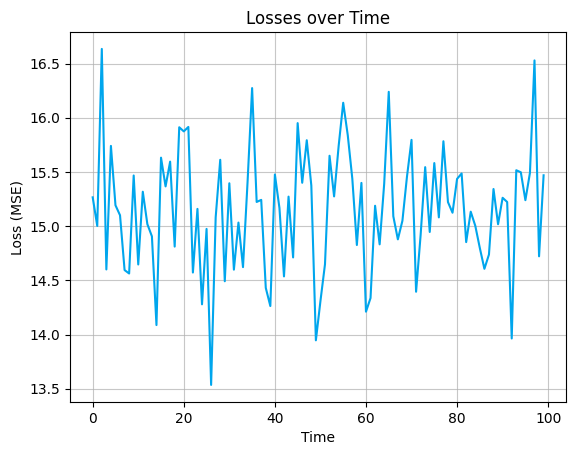

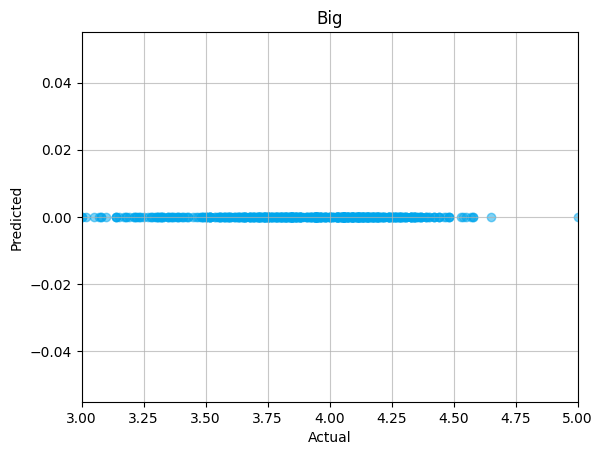

In [237]:
average_losses(cherry_big_model, mse)
visualize_losses(cherry_biglp_losses, "MSE")
visualize_preds("Big", cherry_big_model, 3, 5)

### Using HuberLoss

Nine layer model

In [238]:
class CherryNineLP(nn.Module):
    def __init__(self):
        super(CherryNineLP, self).__init__()
        self.layer1 = nn.Linear(9, 128)
        self.layer2 = nn.Linear(128, 512)
        self.layer3 = nn.Linear(512, 1024)
        self.layer4 = nn.Linear(1024, 1024)
        self.layer5 = nn.Linear(1024, 512)
        self.layer6 = nn.Linear(512, 128)
        self.layer7 = nn.Linear(128, 64)
        self.layer8 = nn.Linear(64, 32)
        self.layer9 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x))
        x = torch.relu(self.layer6(x))
        x = torch.relu(self.layer7(x))
        x = torch.relu(self.layer8(x))
        return torch.relu(self.layer9(x))

huber = nn.HuberLoss()
cherry_nine_layer = CherryNineLP()
cherry_9lp_losses = train(cherry_nine_layer, huber, 100)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:1102: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:1102: UserWarning: Using a target size (torch.Size([23])) that is different to the input size (torch.Size([23, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)


Epoch 1/100, Loss: 3.4469563961029053
Epoch 2/100, Loss: 3.4230434894561768
Epoch 3/100, Loss: 3.3395655155181885
Epoch 4/100, Loss: 3.498260498046875
Epoch 5/100, Loss: 3.3756520748138428
Epoch 6/100, Loss: 3.3486955165863037
Epoch 7/100, Loss: 3.3878262042999268
Epoch 8/100, Loss: 3.399130344390869
Epoch 9/100, Loss: 3.5260870456695557
Epoch 10/100, Loss: 3.386521577835083
Epoch 11/100, Loss: 3.4682610034942627
Epoch 12/100, Loss: 3.376086950302124
Epoch 13/100, Loss: 3.355652093887329
Epoch 14/100, Loss: 3.1947827339172363
Epoch 15/100, Loss: 3.4700002670288086
Epoch 16/100, Loss: 3.485217571258545
Epoch 17/100, Loss: 3.479565143585205
Epoch 18/100, Loss: 3.295217514038086
Epoch 19/100, Loss: 3.4456522464752197
Epoch 20/100, Loss: 3.355217695236206
Epoch 21/100, Loss: 3.336087226867676
Epoch 22/100, Loss: 3.3691303730010986
Epoch 23/100, Loss: 3.49173903465271
Epoch 24/100, Loss: 3.5200002193450928
Epoch 25/100, Loss: 3.478695869445801
Epoch 26/100, Loss: 3.355217218399048
Epoch 27/

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:1102: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)


Avg Train Loss: 3.3846174115720005
Avg Test Loss: 3.384247726864285


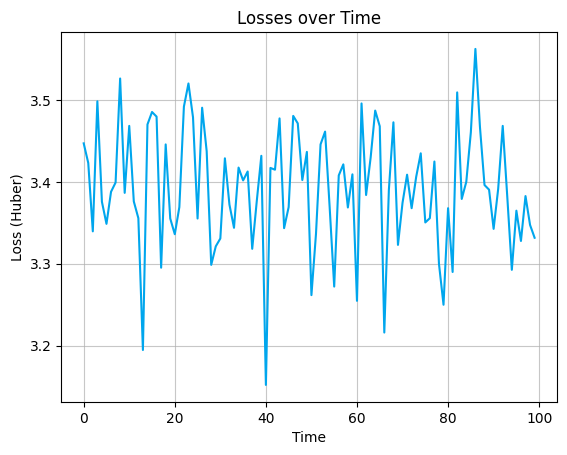

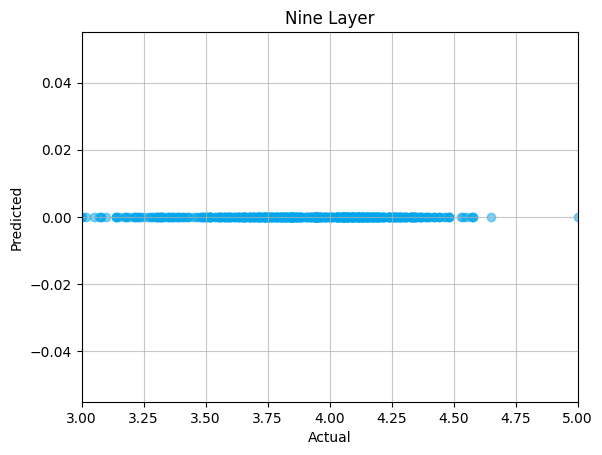

In [239]:
average_losses(cherry_nine_layer, huber)
visualize_losses(cherry_9lp_losses, "Huber")
visualize_preds("Nine Layer", cherry_nine_layer, 3, 5)

Tiny model

In [240]:
class CherryTinyModel(nn.Module):
    def __init__(self):
        super(CherryTinyModel, self).__init__()
        self.layer1 = nn.Linear(9, 10)
        self.layer2 = nn.Linear(10, 5)
        self.layer3 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return torch.relu(self.layer3(x))

cherry_tiny_model = CherryTinyModel()
cherry_tinylp_losses = train(cherry_tiny_model, huber, 100)

Epoch 1/100, Loss: 290.03314208984375
Epoch 2/100, Loss: 3.3234782218933105
Epoch 3/100, Loss: 3.4065215587615967
Epoch 4/100, Loss: 3.4269566535949707
Epoch 5/100, Loss: 3.2986958026885986
Epoch 6/100, Loss: 3.378695487976074
Epoch 7/100, Loss: 3.3130435943603516
Epoch 8/100, Loss: 3.4499998092651367
Epoch 9/100, Loss: 3.3417389392852783
Epoch 10/100, Loss: 3.365652084350586
Epoch 11/100, Loss: 3.353043556213379
Epoch 12/100, Loss: 3.3930435180664062
Epoch 13/100, Loss: 3.2921741008758545
Epoch 14/100, Loss: 3.3952176570892334
Epoch 15/100, Loss: 3.5217392444610596
Epoch 16/100, Loss: 3.3830435276031494
Epoch 17/100, Loss: 3.506521701812744
Epoch 18/100, Loss: 3.289130449295044
Epoch 19/100, Loss: 3.31000018119812
Epoch 20/100, Loss: 3.3565218448638916
Epoch 21/100, Loss: 3.450434923171997
Epoch 22/100, Loss: 3.456087112426758
Epoch 23/100, Loss: 3.1582610607147217
Epoch 24/100, Loss: 3.4165217876434326
Epoch 25/100, Loss: 3.2039129734039307
Epoch 26/100, Loss: 3.354782819747925
Epoch

Avg Train Loss: 3.38436396225639
Avg Test Loss: 3.384247726864285


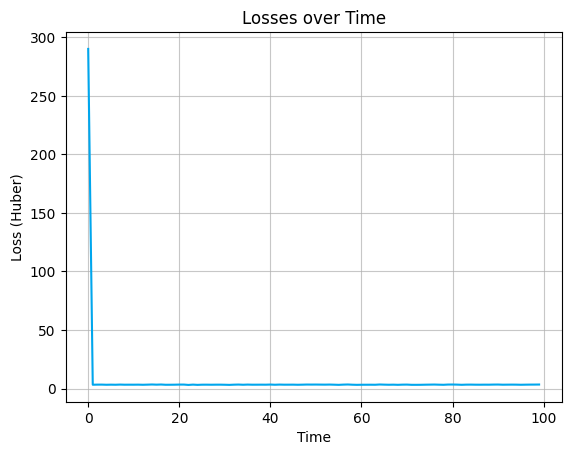

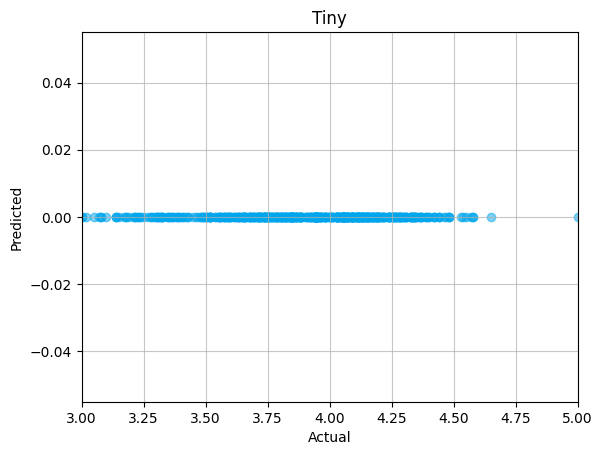

In [241]:
average_losses(cherry_tiny_model, huber)
visualize_losses(cherry_tinylp_losses, "Huber")
visualize_preds("Tiny", cherry_tiny_model, 3, 5)

## Takeaway

When it came to linear regression, the cherry-picked data did slightly better than PCA. However, it was still not enough to get reliable predictions.

As for the neural networks, the cherry-picked data did terrible. Pretty much all of the predictions hovered right around 0.

# Conclusion

As we can see from our many unimpressive models, it’s difficult to predict the average Goodreads score of books based on their qualities (such as pacing, difficulty of reading, or amount of fluff) and other details such as author gender or whether the book won a prize. While this is disappointing from a data science perspective, it's good news for readers and writers! This suggests that there is no formula for what makes a book good, so writers can simply write how they’d like without worrying about achieving the perfect average sentence length or the correct number of characters.

One of the few features with significant variation in Goodreads rating average was genre, although this likely indicates which genres are more popular with readers, and not that certain genres lend themselves to more quality writing.

Winning or shortlisting for a prize also correlated with a higher Goodreads rating, which is to be expected, as books that win prizes are judged to be of higher quality. So, readers in search of a good book may want to check out a list of award-winning novels!

On another positive note, there was no significant difference in Goodreads rating averages across author genders, suggesting that readers do not exhibit bias towards the book based on the author’s gender.

Overall: we learn that there’s no “secret sauce” for a good book, so read and write whatever you like!


# Further Reading

Dataset
*   [Source](https://figshare.com/articles/dataset/CONLIT/21166171/1)
*   [Background from author](https://www.google.com/url?q=https://openhumanitiesdata.metajnl.com/articles/88/files/submission/proof/88-1-1498-1-10-20221011.pdf&sa=D&source=docs&ust=1746762301958753&usg=AOvVaw0CaGlf6PUnoXp2gALvY70p)

Literary rating sites
*   [Goodreads](https://www.goodreads.com/)
*   [Storygraph](https://www.thestorygraph.com/)

Data Science
*   [Huber Loss](https://medium.com/@devcharlie2698619/understanding-huber-loss-function-insights-from-applications-5c1c5145d2c4)
*   [Linear Regression](https://www.geeksforgeeks.org/ml-linear-regression/)
*   [Neural Networks](https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/)
*   [Overfitting and Underfitting](https://www.ibm.com/think/topics/overfitting-vs-underfitting)